# Bab 9: Teknik-Teknik Unsupervised Learning

## Pendahuluan

Sebagian besar aplikasi Machine Learning saat ini didasarkan pada supervised learning, namun sebagian besar data yang tersedia tidak memiliki label. Seperti yang dikatakan oleh Yann LeCun: "Jika intelligence adalah sebuah kue, maka unsupervised learning adalah kue-nya, supervised learning adalah lapisan krim di atasnya, dan reinforcement learning adalah ceri di atasnya."

Dalam bab ini, kita akan mempelajari beberapa teknik unsupervised learning yang penting:

1. **Clustering**: Mengelompokkan instance yang serupa ke dalam cluster
2. **Anomaly Detection**: Mengidentifikasi instance yang menyimpang dari normal
3. **Density Estimation**: Memperkirakan fungsi kepadatan probabilitas dari data

## 9.1 Clustering

Clustering adalah tugas mengidentifikasi instance yang serupa dan mengelompokkannya ke dalam cluster. Berbeda dengan klasifikasi, clustering adalah tugas unsupervised.

### Aplikasi Clustering:

- **Segmentasi Pelanggan**: Mengelompokkan pelanggan berdasarkan pembelian dan aktivitas
- **Analisis Data**: Menganalisis setiap cluster secara terpisah
- **Reduksi Dimensionalitas**: Mengganti fitur asli dengan jarak ke centroid cluster
- **Deteksi Anomali**: Instance dengan afinitas rendah ke semua cluster
- **Semi-supervised Learning**: Menyebarkan label dalam cluster yang sama
- **Search Engine**: Mengelompokkan gambar serupa
- **Segmentasi Gambar**: Mengelompokkan piksel berdasarkan warna`

In [41]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.datasets import make_blobs, make_moons, load_digits
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproducibility
np.random.seed(42)

# Konfigurasi matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

## 9.2 K-Means Clustering

K-Means adalah algoritma clustering yang sederhana dan efisien. Algoritma ini mencari centroid dari setiap cluster dan mengelompokkan instance berdasarkan jarak terdekat ke centroid.

### Cara Kerja K-Means:
1. Pilih k centroid secara acak
2. Assign setiap instance ke cluster terdekat
3. Update centroid berdasarkan rata-rata instance dalam cluster
4. Ulangi langkah 2-3 hingga konvergen

### Kelebihan K-Means:
- Cepat dan scalable
- Sederhana untuk diimplementasikan
- Efektif untuk cluster berbentuk bulat

### Kekurangan K-Means:
- Harus menentukan jumlah cluster k
- Sensitif terhadap inisialisasi
- Tidak baik untuk cluster dengan bentuk non-spherical

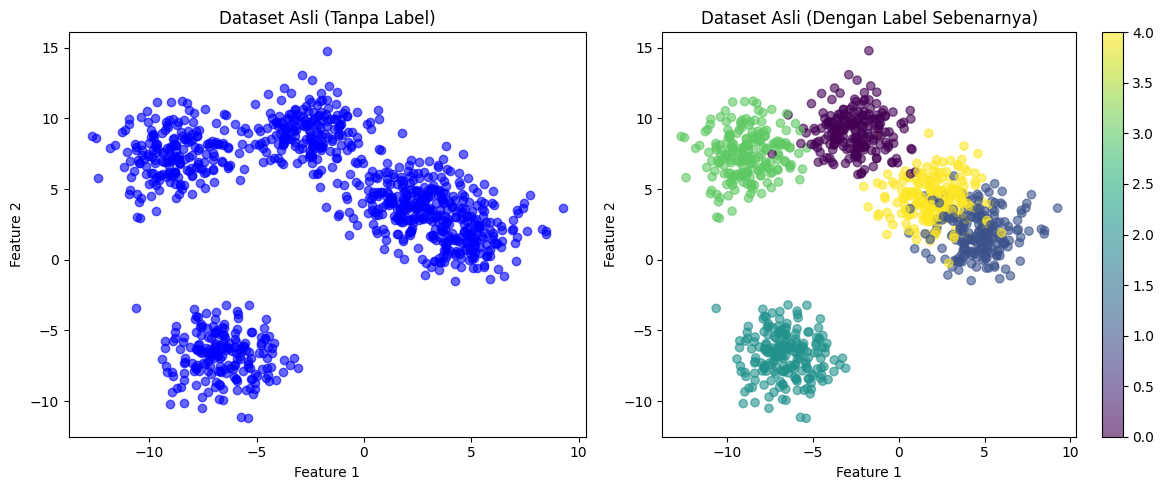

Shape dataset: (1000, 2)
Jumlah cluster sebenarnya: 5
=== Hasil K-Means Clustering ===
Jumlah cluster: 5
Inertia (WCSS): 3979.60
Jumlah iterasi: 4

Centroid cluster:
Cluster 0: (-6.59, -6.78)
Cluster 1: (-2.53, 9.07)
Cluster 2: (2.06, 4.27)
Cluster 3: (-8.83, 7.44)
Cluster 4: (4.94, 1.62)


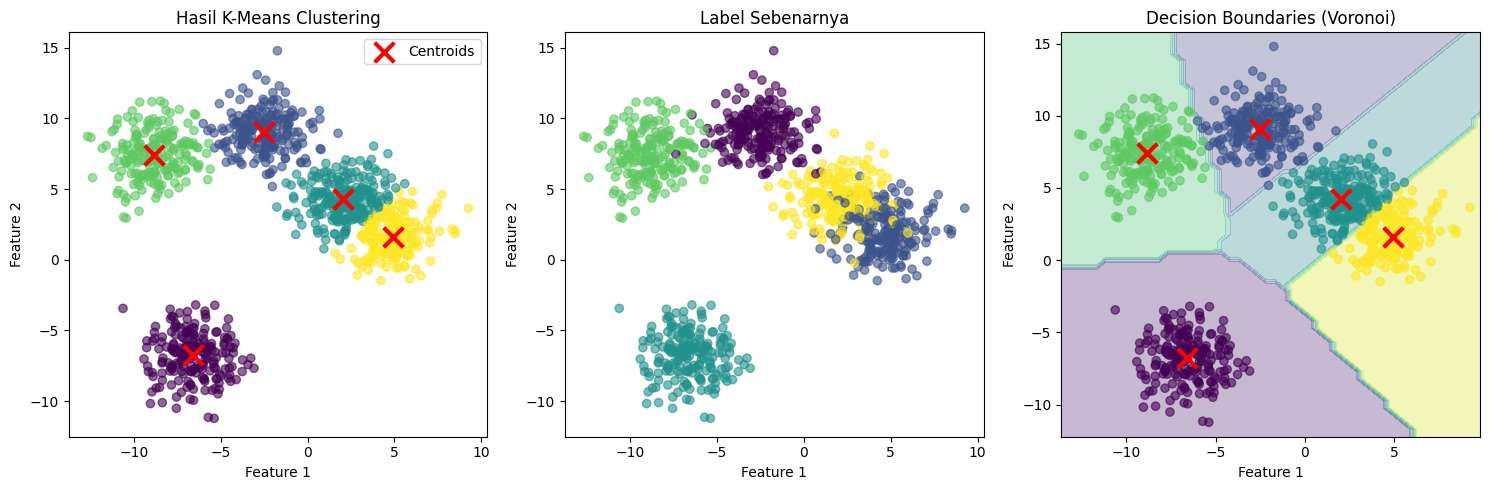

In [42]:
# Membuat dataset dengan 5 cluster
X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=1.5, 
                       center_box=(-10.0, 10.0), random_state=42)

# Visualisasi dataset asli
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.6)
plt.title('Dataset Asli (Tanpa Label)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6)
plt.title('Dataset Asli (Dengan Label Sebenarnya)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"Shape dataset: {X.shape}")
print(f"Jumlah cluster sebenarnya: {len(np.unique(y_true))}")

# Implementasi K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Informasi hasil clustering
print("=== Hasil K-Means Clustering ===")
print(f"Jumlah cluster: {k}")
print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")
print(f"Jumlah iterasi: {kmeans.n_iter_}")

# Centroid yang ditemukan
print(f"\nCentroid cluster:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

# Visualisasi hasil clustering
plt.figure(figsize=(15, 5))

# Plot 1: Hasil clustering
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('Hasil K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot 2: Perbandingan dengan label sebenarnya
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6)
plt.title('Label Sebenarnya')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 3: Decision boundaries (Voronoi diagram)
plt.subplot(1, 3, 3)
# Membuat grid untuk decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

# Prediksi untuk setiap titik dalam grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidths=3)
plt.title('Decision Boundaries (Voronoi)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

### Hard vs Soft Clustering

**Hard Clustering**: Setiap instance ditetapkan ke satu cluster saja
**Soft Clustering**: Setiap instance mendapat skor untuk setiap cluster

K-Means secara default melakukan hard clustering, tetapi kita dapat melakukan soft clustering dengan menggunakan method `transform()` yang menghitung jarak ke setiap centroid.

=== Prediksi untuk Instance Baru ===
Instance baru:
[[ 0.   2. ]
 [ 3.   2. ]
 [-3.   3. ]
 [-3.   2.5]]

Hard clustering (cluster assignment): [2 4 2 2]

Soft clustering (jarak ke setiap centroid):
Instance 0: [0. 2.] -> Cluster 2
  Jarak ke semua centroid: [10.98  7.51  3.07 10.37  4.96]
  Jarak terdekat: 3.07

Instance 1: [3. 2.] -> Cluster 4
  Jarak ke semua centroid: [13.    8.98  2.46 13.02  1.98]
  Jarak terdekat: 1.98

Instance 2: [-3.  3.] -> Cluster 2
  Jarak ke semua centroid: [10.42  6.09  5.22  7.32  8.06]
  Jarak terdekat: 5.22

Instance 3: [-3.   2.5] -> Cluster 2
  Jarak ke semua centroid: [9.95 6.59 5.36 7.64 7.99]
  Jarak terdekat: 5.36



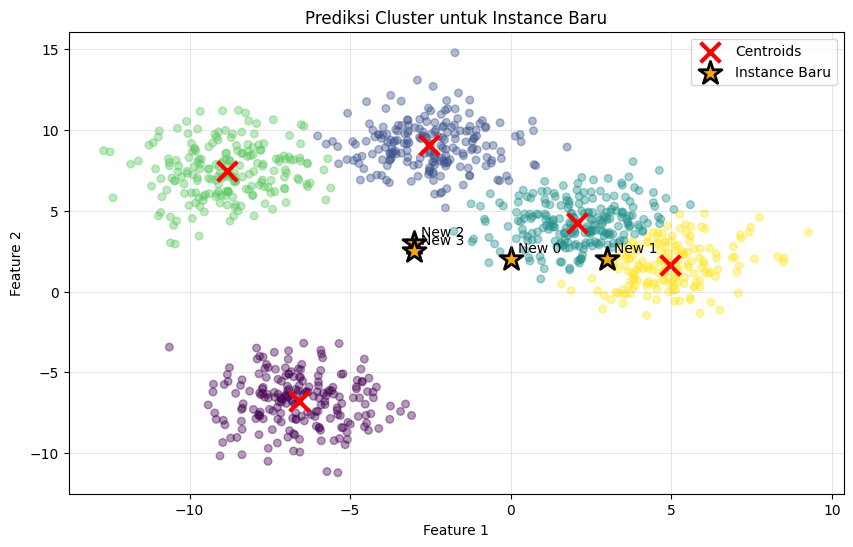

In [43]:
# Contoh prediksi untuk instance baru
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

print("=== Prediksi untuk Instance Baru ===")
print(f"Instance baru:\n{X_new}")

# Hard clustering
y_new_pred = kmeans.predict(X_new)
print(f"\nHard clustering (cluster assignment): {y_new_pred}")

# Soft clustering (jarak ke setiap centroid)
distances = kmeans.transform(X_new)
print(f"\nSoft clustering (jarak ke setiap centroid):")
for i, (instance, dist, cluster) in enumerate(zip(X_new, distances, y_new_pred)):
    print(f"Instance {i}: {instance} -> Cluster {cluster}")
    print(f"  Jarak ke semua centroid: {dist.round(2)}")
    print(f"  Jarak terdekat: {dist.min():.2f}")
    print()

# Visualisasi instance baru
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.4, s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.scatter(X_new[:, 0], X_new[:, 1], c='orange', marker='*', 
           s=300, linewidths=2, edgecolors='black', label='Instance Baru')

# Annotate instance baru
for i, (x, y) in enumerate(X_new):
    plt.annotate(f'New {i}', (x, y), xytext=(5, 5), textcoords='offset points')

plt.title('Prediksi Cluster untuk Instance Baru')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 9.3 Algoritma K-Means dan Metode Inisialisasi

### K-Means++ Initialization
K-Means++ adalah metode inisialisasi yang lebih cerdas dibandingkan inisialisasi acak. Metode ini memilih centroid awal yang berjauhan satu sama lain, sehingga mengurangi kemungkinan konvergen ke solusi suboptimal.

### Accelerated K-Means
Menggunakan triangle inequality untuk menghindari perhitungan jarak yang tidak perlu.

### Mini-Batch K-Means
Menggunakan mini-batch dari dataset pada setiap iterasi, membuat algoritma lebih cepat untuk dataset besar.

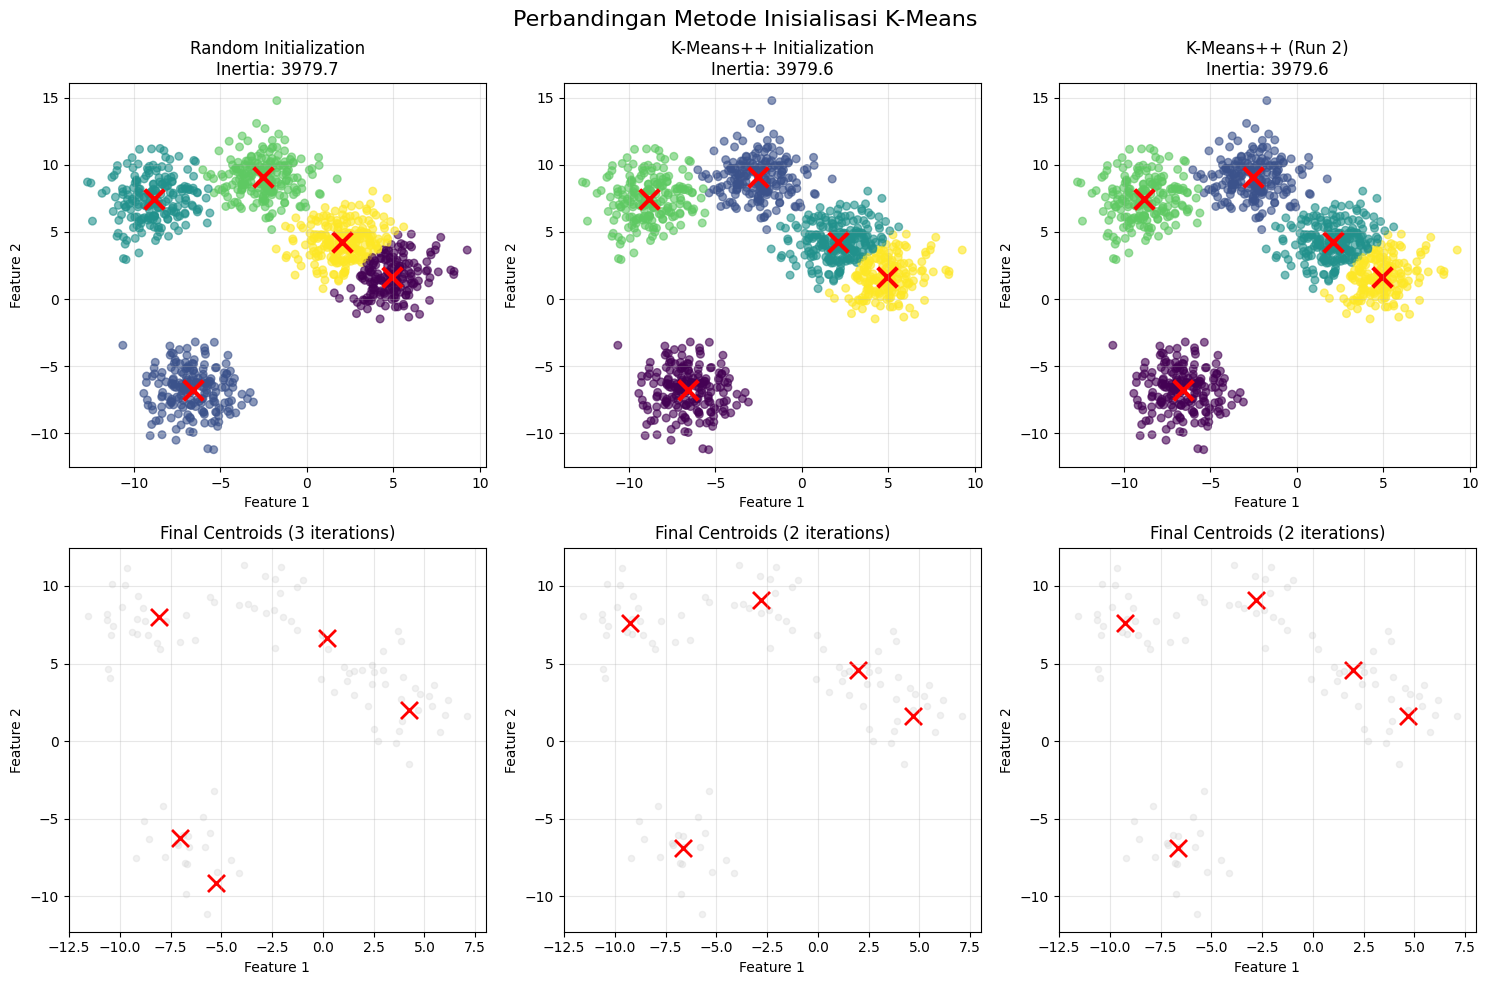

=== Perbandingan Metode Inisialisasi ===
Random Initialization    : Inertia = 3979.66, Iterations = 17
K-Means++ Initialization : Inertia = 3979.60, Iterations = 4
K-Means++ (Run 2)        : Inertia = 3979.60, Iterations = 4

=== Perbandingan K-Means vs Mini-Batch K-Means ===
Dataset size: 10,000 instances
K-Means Regular     : 0.012s, Inertia: 80424.2
Mini-Batch K-Means  : 0.035s, Inertia: 69841.7
Speedup: 0.4x
Inertia difference: 10582.5


In [44]:
# Perbandingan metode inisialisasi
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Perbandingan Metode Inisialisasi K-Means', fontsize=16)

methods = [
    ('random', 'Random Initialization'),
    ('k-means++', 'K-Means++ Initialization'),
    ('k-means++', 'K-Means++ (Run 2)')
]

results = []

for idx, (init_method, title) in enumerate(methods):
    # Baris pertama: hasil clustering
    ax1 = axes[0, idx]
    
    # Gunakan random state yang berbeda untuk random initialization
    random_state = 42 if init_method == 'k-means++' else 10 + idx
    
    kmeans = KMeans(n_clusters=5, init=init_method, n_init=1, random_state=random_state)
    y_pred = kmeans.fit_predict(X)
    
    results.append({
        'method': title,
        'inertia': kmeans.inertia_,
        'n_iter': kmeans.n_iter_,
        'labels': y_pred,
        'centers': kmeans.cluster_centers_
    })
    
    ax1.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6, s=30)
    ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               c='red', marker='x', s=200, linewidths=3)
    ax1.set_title(f'{title}\nInertia: {kmeans.inertia_:.1f}')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.grid(True, alpha=0.3)
    
    # Baris kedua: convergence path (simulasi)
    ax2 = axes[1, idx]
    # Untuk visualization convergence, kita akan menunjukkan beberapa iterasi
    kmeans_trace = KMeans(n_clusters=5, init=init_method, max_iter=3, 
                         n_init=1, random_state=random_state)
    
    # Iterasi manual untuk menunjukkan pergerakan centroid
    X_subset = X[:100]  # Gunakan subset untuk visualisasi yang lebih jelas
    kmeans_trace.fit(X_subset)
    
    ax2.scatter(X_subset[:, 0], X_subset[:, 1], alpha=0.3, s=20, c='lightgray')
    ax2.scatter(kmeans_trace.cluster_centers_[:, 0], kmeans_trace.cluster_centers_[:, 1], 
               c='red', marker='x', s=150, linewidths=2)
    ax2.set_title(f'Final Centroids ({kmeans_trace.n_iter_} iterations)')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ringkasan hasil
print("=== Perbandingan Metode Inisialisasi ===")
for result in results:
    print(f"{result['method']:<25}: Inertia = {result['inertia']:.2f}, Iterations = {result['n_iter']}")

# Demonstrasi Mini-Batch K-Means
print("\n=== Perbandingan K-Means vs Mini-Batch K-Means ===")

# Dataset yang lebih besar untuk demonstrasi
X_large, _ = make_blobs(n_samples=10000, centers=5, cluster_std=2, random_state=42)

import time

# K-Means biasa
start_time = time.time()
kmeans_regular = KMeans(n_clusters=5, random_state=42)
kmeans_regular.fit(X_large)
time_regular = time.time() - start_time

# Mini-Batch K-Means
start_time = time.time()
kmeans_mini = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100)
kmeans_mini.fit(X_large)
time_mini = time.time() - start_time

print(f"Dataset size: {X_large.shape[0]:,} instances")
print(f"K-Means Regular     : {time_regular:.3f}s, Inertia: {kmeans_regular.inertia_:.1f}")
print(f"Mini-Batch K-Means  : {time_mini:.3f}s, Inertia: {kmeans_mini.inertia_:.1f}")
print(f"Speedup: {time_regular/time_mini:.1f}x")
print(f"Inertia difference: {abs(kmeans_regular.inertia_ - kmeans_mini.inertia_):.1f}")

## 9.4 Menentukan Jumlah Cluster Optimal

Menentukan jumlah cluster k adalah salah satu tantangan utama dalam K-Means. Ada beberapa metode yang dapat digunakan:

### 1. Elbow Method
Mencari "siku" dalam grafik inertia vs jumlah cluster

### 2. Silhouette Analysis
Mengukur seberapa baik setiap instance cocok dengan cluster-nya dibandingkan dengan cluster lain

### 3. Silhouette Score
Rata-rata silhouette coefficient dari semua instance

=== Evaluasi Jumlah Cluster Optimal ===
k	Inertia		Silhouette Score
----------------------------------------
2	31131.9		0.559
3	9653.8		0.646
4	5442.7		0.629
5	3979.6		0.567
6	3624.1		0.506
7	3300.5		0.420
8	3011.3		0.384
9	2729.1		0.369
10	2471.6		0.333


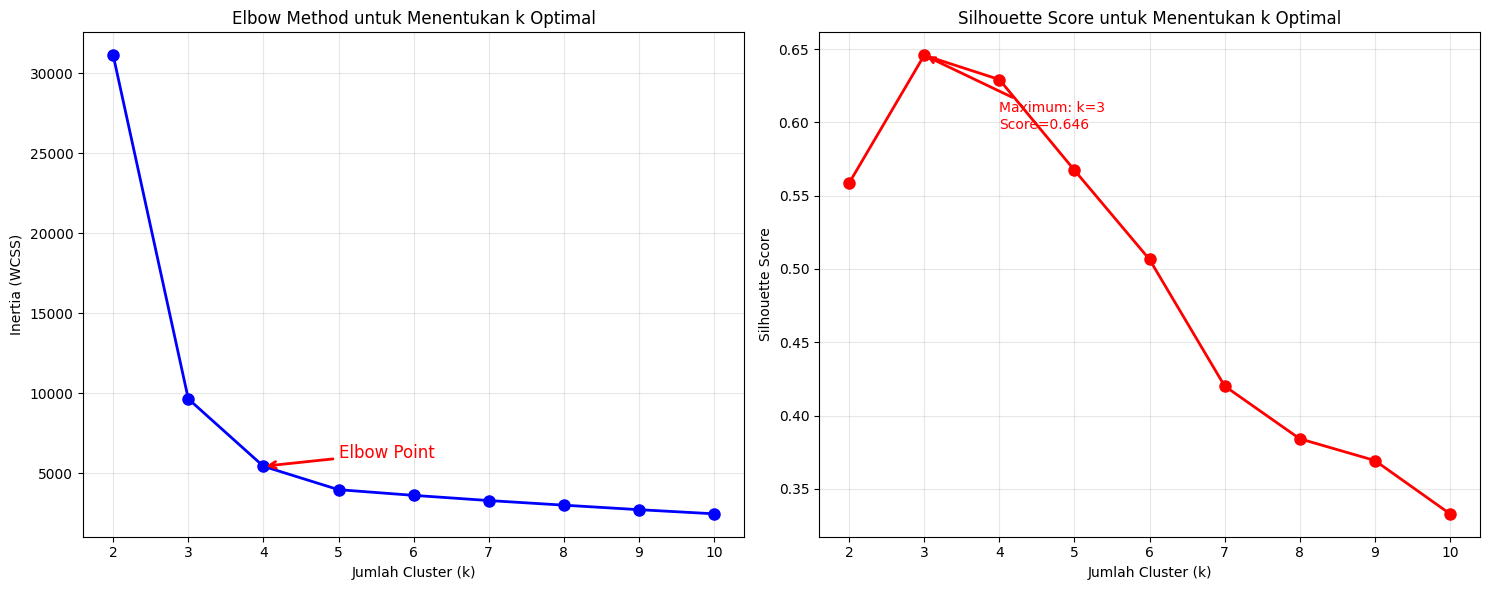


Rekomendasi:
- Elbow Method: k = 4 (visual inspection)
- Silhouette Score: k = 3 (score = 0.646)


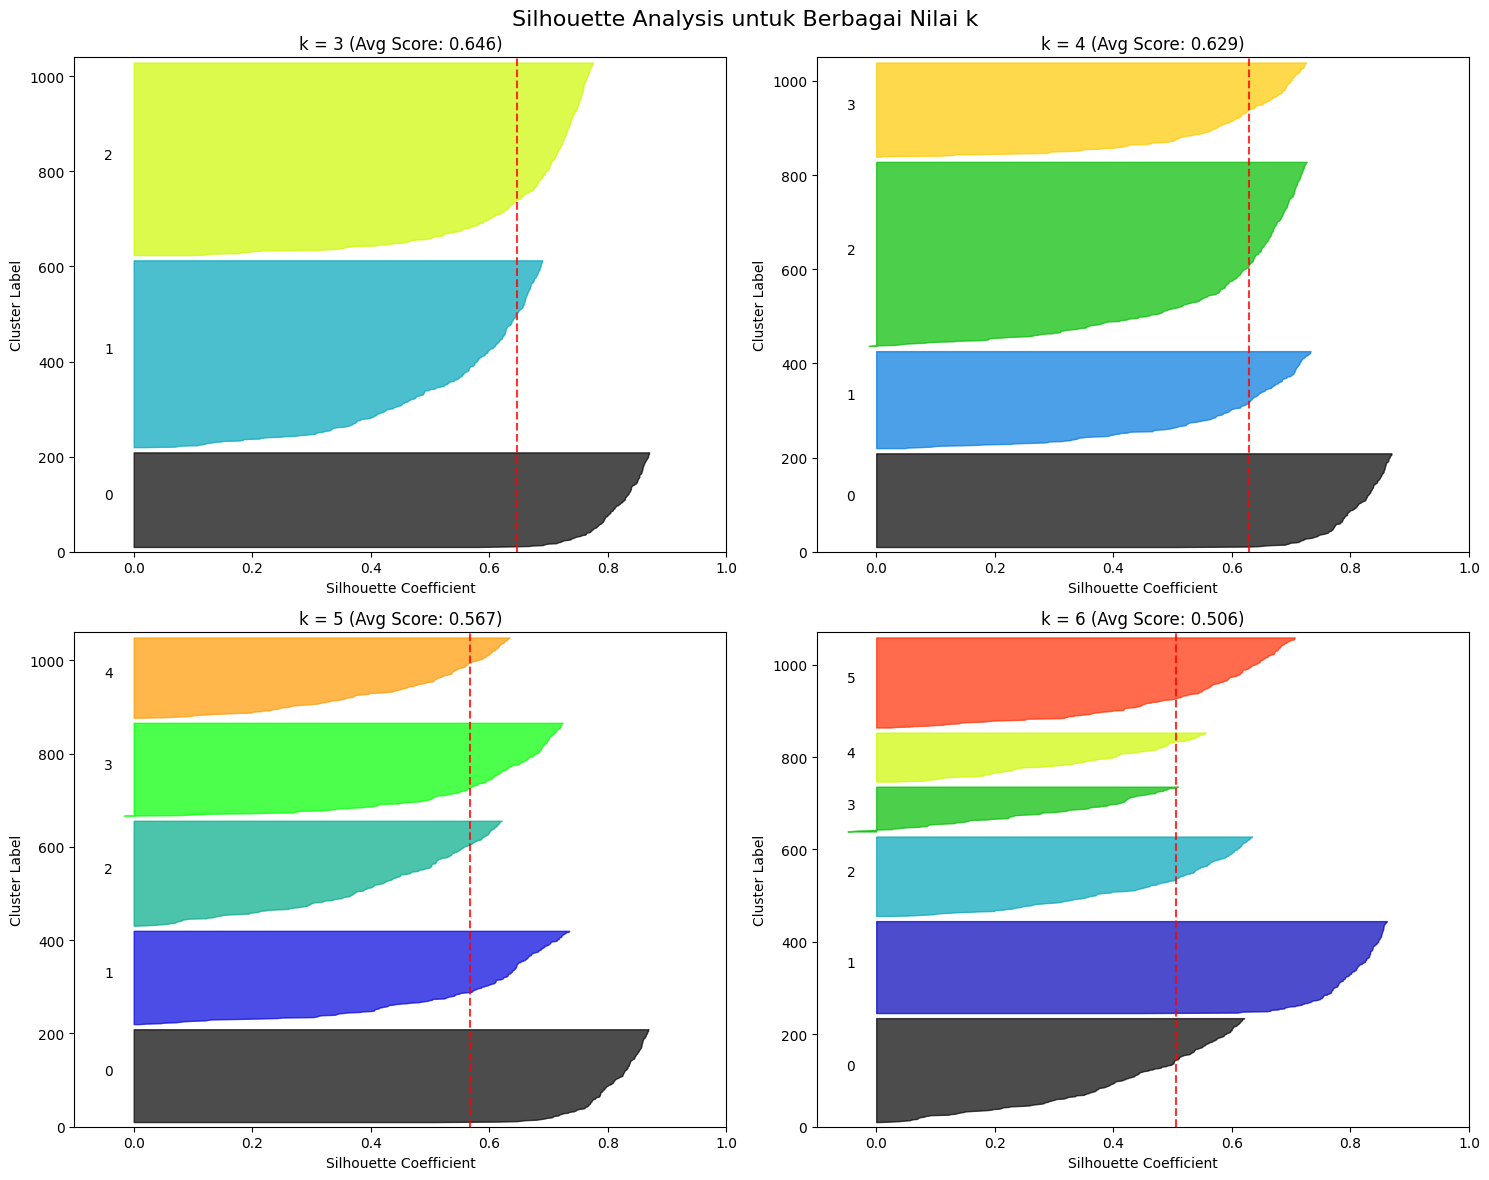


=== Analisis Detail untuk k = 5 ===
Silhouette Score: 0.567
Inertia: 3979.6

Distribusi instance per cluster:
Cluster 0: 200 instances (20.0%)
Cluster 1: 201 instances (20.1%)
Cluster 2: 226 instances (22.6%)
Cluster 3: 200 instances (20.0%)
Cluster 4: 173 instances (17.3%)


In [45]:
# Evaluasi berbagai jumlah cluster
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("=== Evaluasi Jumlah Cluster Optimal ===")
print("k\tInertia\t\tSilhouette Score")
print("-" * 40)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X)
    
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X, y_pred)
    
    inertias.append(inertia)
    silhouette_scores.append(silhouette_avg)
    
    print(f"{k}\t{inertia:.1f}\t\t{silhouette_avg:.3f}")

# Plot Elbow Method dan Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('Inertia (WCSS)')
ax1.set_title('Elbow Method untuk Menentukan k Optimal')
ax1.grid(True, alpha=0.3)

# Tambahkan annotation untuk elbow
elbow_k = 4  # Berdasarkan visual inspection
ax1.annotate('Elbow Point', xy=(elbow_k, inertias[elbow_k-2]), 
            xytext=(elbow_k+1, inertias[elbow_k-2]+500),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red')

# Silhouette Score
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Jumlah Cluster (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score untuk Menentukan k Optimal')
ax2.grid(True, alpha=0.3)

# Tambahkan annotation untuk maximum
max_silhouette_k = k_range[np.argmax(silhouette_scores)]
max_silhouette_score = max(silhouette_scores)
ax2.annotate(f'Maximum: k={max_silhouette_k}\nScore={max_silhouette_score:.3f}', 
            xy=(max_silhouette_k, max_silhouette_score), 
            xytext=(max_silhouette_k+1, max_silhouette_score-0.05),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, color='red')

plt.tight_layout()
plt.show()

print(f"\nRekomendasi:")
print(f"- Elbow Method: k = {elbow_k} (visual inspection)")
print(f"- Silhouette Score: k = {max_silhouette_k} (score = {max_silhouette_score:.3f})")

# Silhouette Analysis untuk k = 3, 4, 5, 6
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Silhouette Analysis untuk Berbagai Nilai k', fontsize=16)

k_values = [3, 4, 5, 6]

for idx, k in enumerate(k_values):
    ax = axes[idx//2, idx%2]
    
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Hitung silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(k):
        # Aggregate silhouette scores untuk cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label cluster di tengah
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster Label')
    ax.set_title(f'k = {k} (Avg Score: {silhouette_avg:.3f})')
    
    # Garis vertikal untuk rata-rata silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", alpha=0.8)
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])

plt.tight_layout()
plt.show()

# Analisis detail untuk k optimal
k_optimal = 5
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
y_optimal = kmeans_optimal.fit_predict(X)

print(f"\n=== Analisis Detail untuk k = {k_optimal} ===")
print(f"Silhouette Score: {silhouette_score(X, y_optimal):.3f}")
print(f"Inertia: {kmeans_optimal.inertia_:.1f}")

# Distribusi instance per cluster
unique, counts = np.unique(y_optimal, return_counts=True)
print(f"\nDistribusi instance per cluster:")
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} instances ({count/len(X)*100:.1f}%)")

## 9.5 Keterbatasan K-Means

K-Means memiliki beberapa keterbatasan:

1. **Bentuk Cluster**: Hanya efektif untuk cluster berbentuk bulat (spherical)
2. **Ukuran Cluster**: Tidak baik untuk cluster dengan ukuran yang sangat berbeda
3. **Kepadatan**: Tidak baik untuk cluster dengan kepadatan yang berbeda
4. **Inisialisasi**: Sensitif terhadap inisialisasi centroid awal

Mari kita demonstrasikan keterbatasan ini:

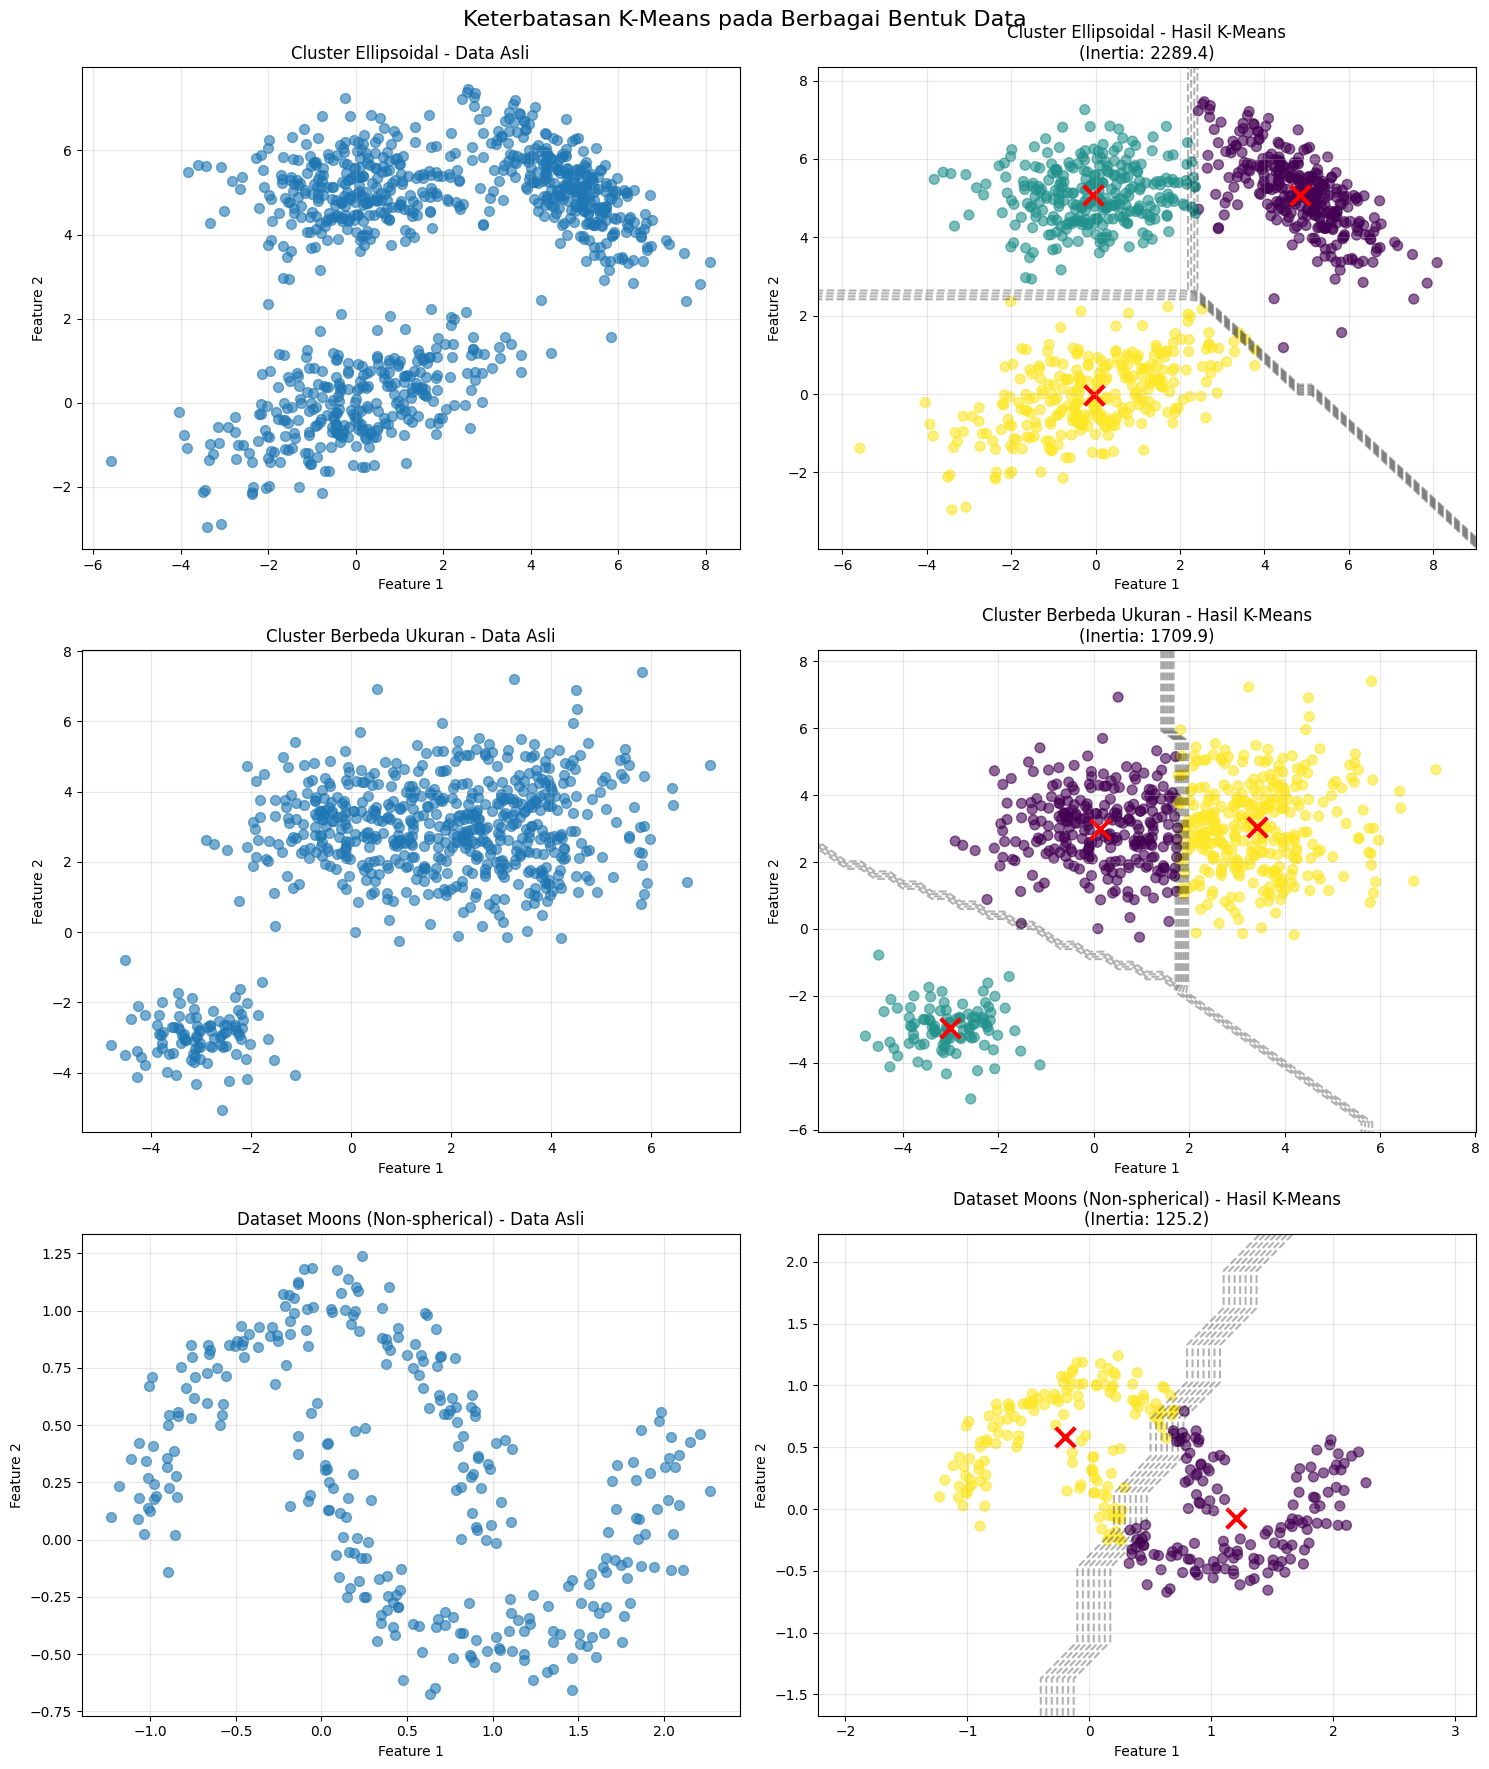

=== Evaluasi Kuantitatif Keterbatasan K-Means ===
Cluster Ellipsoidal           : Silhouette Score = 0.607, Inertia = 2289.4
Cluster Berbeda Ukuran        : Silhouette Score = 0.483, Inertia = 1709.9
Dataset Moons (Non-spherical) : Silhouette Score = 0.479, Inertia = 125.2

Catatan:
- Silhouette score rendah menunjukkan clustering yang kurang baik
- K-Means kesulitan dengan cluster non-spherical dan berbeda ukuran


In [46]:
# Demonstrasi keterbatasan K-Means pada cluster non-spherical
from sklearn.datasets import make_blobs

# Membuat dataset dengan cluster ellipsoidal
np.random.seed(42)
X_ellipsoid = np.random.multivariate_normal([0, 0], [[3, 1], [1, 1]], 300)
X_ellipsoid = np.vstack([
    X_ellipsoid,
    np.random.multivariate_normal([5, 5], [[1, -0.8], [-0.8, 1]], 300),
    np.random.multivariate_normal([0, 5], [[2, 0], [0, 0.5]], 300)
])

# Dataset dengan cluster berbeda ukuran
X_different_sizes = np.vstack([
    np.random.multivariate_normal([-3, -3], [[0.5, 0], [0, 0.5]], 100),  # Kecil
    np.random.multivariate_normal([3, 3], [[2, 0], [0, 2]], 400),        # Besar
    np.random.multivariate_normal([0, 3], [[1, 0], [0, 1]], 200)         # Sedang
])

# Dataset moons (non-spherical)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

datasets = [
    (X_ellipsoid, "Cluster Ellipsoidal", 3),
    (X_different_sizes, "Cluster Berbeda Ukuran", 3),
    (X_moons, "Dataset Moons (Non-spherical)", 2)
]

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Keterbatasan K-Means pada Berbagai Bentuk Data', fontsize=16)

for idx, (X_data, title, n_clusters) in enumerate(datasets):
    # Plot data asli
    ax1 = axes[idx, 0]
    ax1.scatter(X_data[:, 0], X_data[:, 1], alpha=0.6, s=50)
    ax1.set_title(f'{title} - Data Asli')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.grid(True, alpha=0.3)
    
    # Plot hasil K-Means
    ax2 = axes[idx, 1]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X_data)
    
    ax2.scatter(X_data[:, 0], X_data[:, 1], c=y_pred, cmap='viridis', alpha=0.6, s=50)
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               c='red', marker='x', s=200, linewidths=3)
    
    # Tambahkan decision boundary
    if X_data.shape[0] < 1000:  # Hanya untuk dataset kecil
        x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
        y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.3),
                           np.arange(y_min, y_max, 0.3))
        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax2.contour(xx, yy, Z, colors='black', linestyles='dashed', alpha=0.3)
    
    ax2.set_title(f'{title} - Hasil K-Means\n(Inertia: {kmeans.inertia_:.1f})')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluasi kuantitatif
print("=== Evaluasi Kuantitatif Keterbatasan K-Means ===")
for X_data, title, n_clusters in datasets:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X_data)
    
    silhouette_avg = silhouette_score(X_data, y_pred)
    print(f"{title:<30}: Silhouette Score = {silhouette_avg:.3f}, Inertia = {kmeans.inertia_:.1f}")

print("\nCatatan:")
print("- Silhouette score rendah menunjukkan clustering yang kurang baik")
print("- K-Means kesulitan dengan cluster non-spherical dan berbeda ukuran")

## 9.6 Aplikasi Clustering

### 9.6.1 Segmentasi Gambar

Clustering dapat digunakan untuk segmentasi gambar dengan mengelompokkan piksel berdasarkan warna.

Bentuk gambar asli: (100, 100, 3)
Bentuk data untuk clustering: (10000, 3)


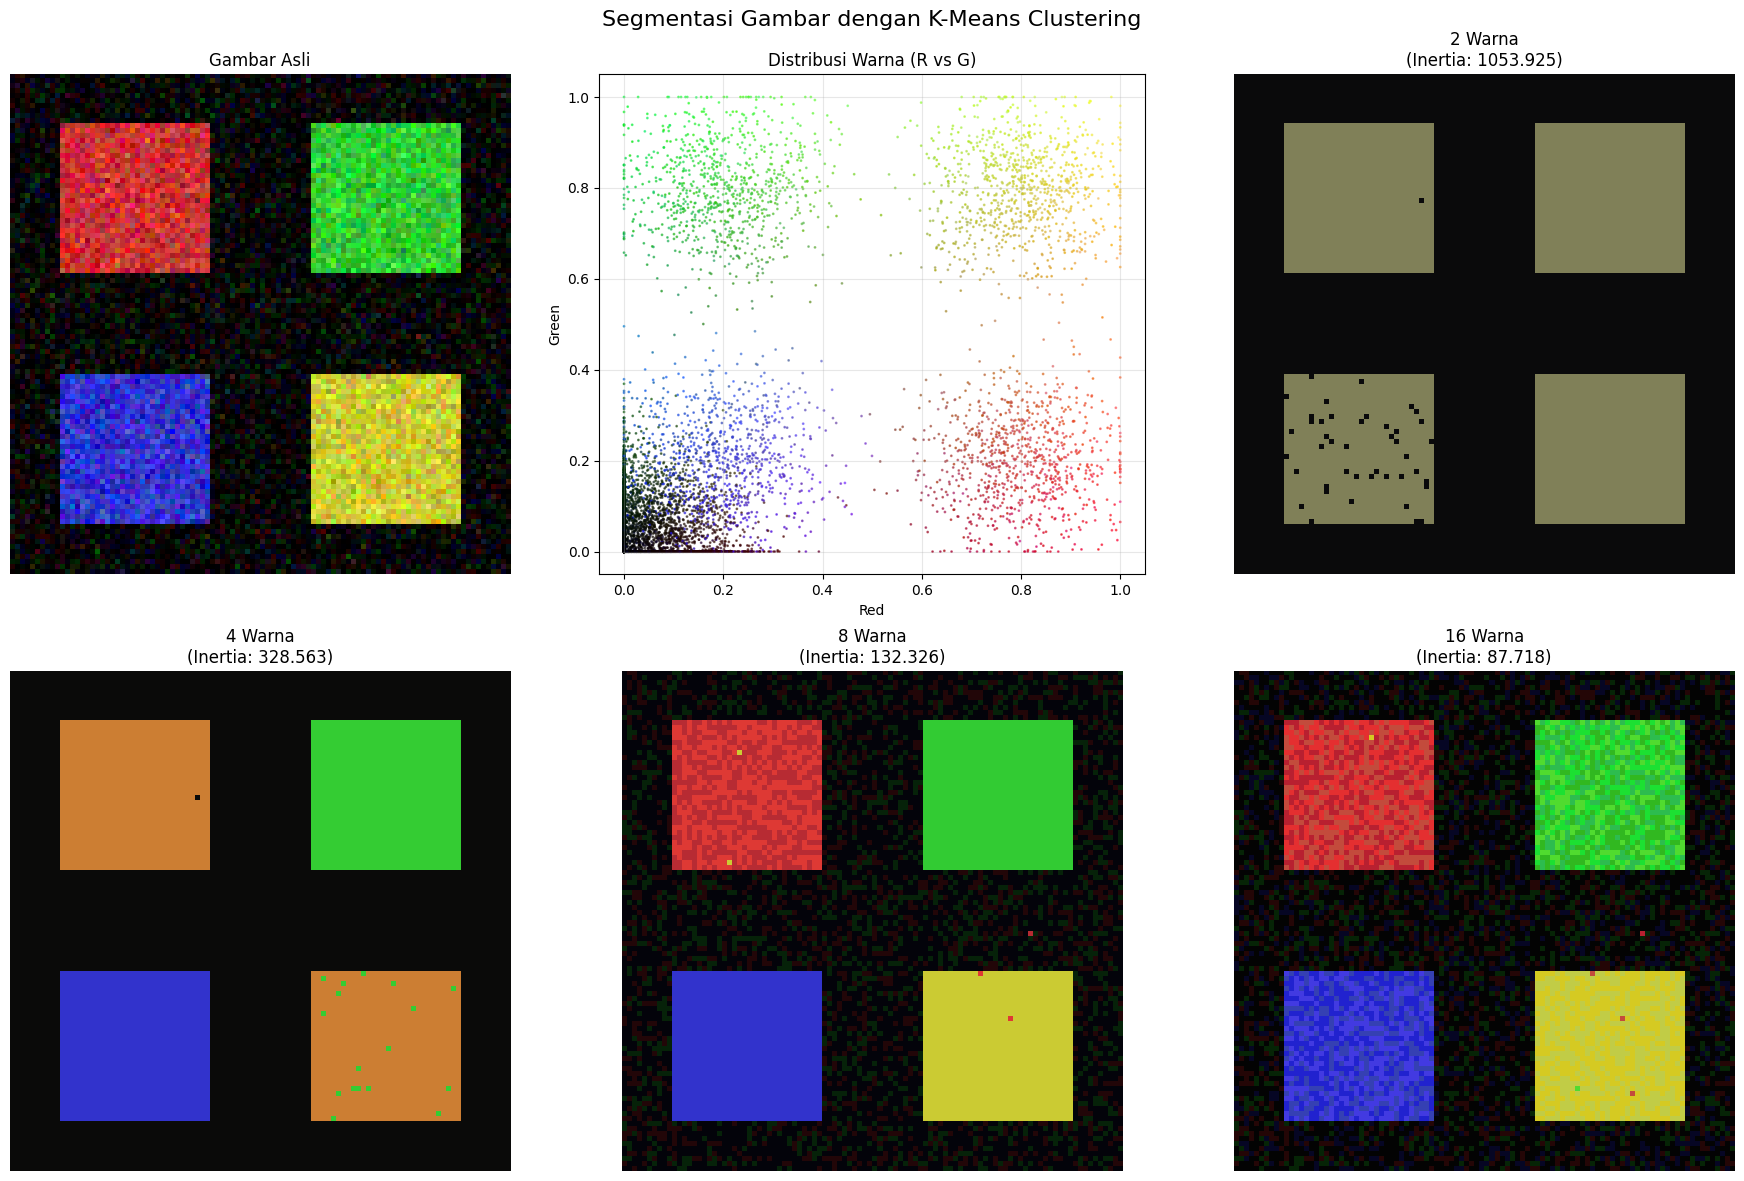


=== Analisis Segmentasi Gambar ===

2 warna:
  Inertia: 1053.925
  Warna dominan (RGB):
    Warna 1: RGB(0.04, 0.04, 0.04) - 64.4%
    Warna 2: RGB(0.50, 0.50, 0.35) - 35.6%

4 warna:
  Inertia: 328.563
  Warna dominan (RGB):
    Warna 1: RGB(0.04, 0.04, 0.04) - 64.0%
    Warna 2: RGB(0.80, 0.50, 0.20) - 17.8%
    Warna 3: RGB(0.21, 0.80, 0.20) - 9.2%
    Warna 4: RGB(0.20, 0.20, 0.80) - 9.0%

8 warna:
  Inertia: 132.326
  Warna dominan (RGB):
    Warna 1: RGB(0.01, 0.01, 0.04) - 37.7%
    Warna 2: RGB(0.02, 0.13, 0.04) - 13.2%
    Warna 3: RGB(0.14, 0.02, 0.03) - 13.1%
    Warna 4: RGB(0.20, 0.80, 0.20) - 9.0%

16 warna:
  Inertia: 87.718
  Warna dominan (RGB):
    Warna 1: RGB(0.01, 0.01, 0.01) - 30.8%
    Warna 2: RGB(0.14, 0.03, 0.03) - 11.2%
    Warna 3: RGB(0.02, 0.14, 0.03) - 11.2%
    Warna 4: RGB(0.02, 0.03, 0.14) - 10.8%


In [47]:
# Simulasi segmentasi gambar dengan clustering warna
# Kita akan membuat gambar sintetis dan melakukan segmentasi warna

# Membuat gambar sintetis dengan beberapa region warna
np.random.seed(42)
image_height, image_width = 100, 100

# Membuat gambar dengan 4 region berbeda
image = np.zeros((image_height, image_width, 3))

# Region 1: Merah
image[10:40, 10:40] = [0.8, 0.2, 0.2]
# Region 2: Hijau  
image[10:40, 60:90] = [0.2, 0.8, 0.2]
# Region 3: Biru
image[60:90, 10:40] = [0.2, 0.2, 0.8]
# Region 4: Kuning
image[60:90, 60:90] = [0.8, 0.8, 0.2]

# Tambahkan noise
noise = np.random.normal(0, 0.1, image.shape)
image = np.clip(image + noise, 0, 1)

# Reshape gambar untuk clustering (setiap piksel menjadi satu instance)
X_image = image.reshape(-1, 3)

print(f"Bentuk gambar asli: {image.shape}")
print(f"Bentuk data untuk clustering: {X_image.shape}")

# Lakukan clustering untuk berbagai jumlah warna
n_colors_list = [2, 4, 8, 16]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Segmentasi Gambar dengan K-Means Clustering', fontsize=16)

# Gambar asli
axes[0, 0].imshow(image)
axes[0, 0].set_title('Gambar Asli')
axes[0, 0].axis('off')

# Distribusi warna dalam ruang RGB
axes[0, 1].scatter(X_image[:, 0], X_image[:, 1], c=X_image, alpha=0.6, s=1)
axes[0, 1].set_xlabel('Red')
axes[0, 1].set_ylabel('Green')
axes[0, 1].set_title('Distribusi Warna (R vs G)')
axes[0, 1].grid(True, alpha=0.3)

# Hasil clustering untuk berbagai jumlah warna
plot_positions = [(0, 2), (1, 0), (1, 1), (1, 2)]

for idx, n_colors in enumerate(n_colors_list):
    row, col = plot_positions[idx]
    
    # Lakukan K-Means clustering
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_image)
    
    # Ganti setiap piksel dengan warna centroid cluster-nya
    segmented_image = kmeans.cluster_centers_[labels]
    segmented_image = segmented_image.reshape(image.shape)
    
    axes[row, col].imshow(segmented_image)
    axes[row, col].set_title(f'{n_colors} Warna\n(Inertia: {kmeans.inertia_:.3f})')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Analisis hasil segmentasi
print("\n=== Analisis Segmentasi Gambar ===")
for n_colors in n_colors_list:
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_image)
    
    print(f"\n{n_colors} warna:")
    print(f"  Inertia: {kmeans.inertia_:.3f}")
    print(f"  Warna dominan (RGB):")
    
    # Urutkan centroid berdasarkan ukuran cluster
    unique_labels, counts = np.unique(labels, return_counts=True)
    sorted_indices = np.argsort(counts)[::-1]
    
    for i, idx in enumerate(sorted_indices[:min(4, n_colors)]):
        color = kmeans.cluster_centers_[idx]
        percentage = counts[idx] / len(labels) * 100
        print(f"    Warna {i+1}: RGB({color[0]:.2f}, {color[1]:.2f}, {color[2]:.2f}) - {percentage:.1f}%")

### 9.6.2 Clustering untuk Preprocessing

Clustering dapat digunakan sebagai teknik reduksi dimensionalitas dengan mengganti fitur asli dengan jarak ke centroid cluster.

Dataset digits:
  Shape: (1797, 64)
  Classes: 10 (0-9)
  Samples per class: 179

Training set: (1437, 64)
Test set: (360, 64)

=== Baseline: Logistic Regression tanpa Preprocessing ===
Akurasi baseline: 0.9583

=== Preprocessing dengan K-Means Clustering ===
n_clusters =  10: Akurasi = 0.9167, Peningkatan = -0.0417
n_clusters =  20: Akurasi = 0.9611, Peningkatan = +0.0028
n_clusters =  50: Akurasi = 0.9694, Peningkatan = +0.0111
n_clusters = 100: Akurasi = 0.9639, Peningkatan = +0.0056


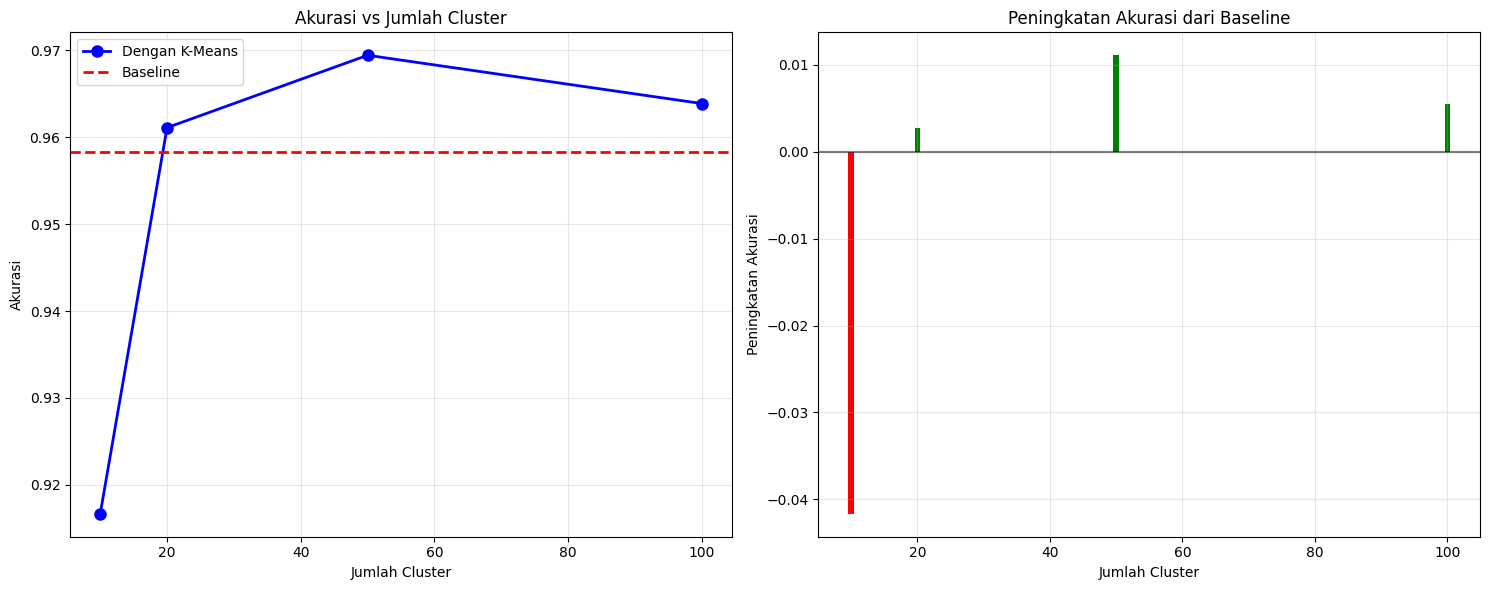


=== Grid Search untuk Cluster Optimal ===
Cluster optimal: 60
Akurasi terbaik: 0.9639
Peningkatan dari baseline: +0.0056

=== Analisis Transformasi Fitur ===
Dimensi asli: 64
Dimensi setelah clustering: 60
Reduksi dimensi: 4 (6.2%)

Contoh transformasi (5 sample pertama):
Original shape per sample: (64,)
Transformed shape per sample: (60,)

Jarak ke setiap cluster untuk sample pertama:
Min distance: 31.27
Max distance: 57.28
Mean distance: 46.11


In [48]:
# Menggunakan clustering untuk preprocessing - contoh dengan digits dataset
from sklearn.datasets import load_digits

# Load digits dataset
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

print(f"Dataset digits:")
print(f"  Shape: {X_digits.shape}")
print(f"  Classes: {len(np.unique(y_digits))} (0-9)")
print(f"  Samples per class: {len(y_digits) // len(np.unique(y_digits))}")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Baseline: Logistic Regression tanpa preprocessing
print("\n=== Baseline: Logistic Regression tanpa Preprocessing ===")
log_reg_baseline = LogisticRegression(max_iter=1000, random_state=42)
log_reg_baseline.fit(X_train, y_train)
baseline_score = log_reg_baseline.score(X_test, y_test)
print(f"Akurasi baseline: {baseline_score:.4f}")

# Preprocessing dengan K-Means clustering
print("\n=== Preprocessing dengan K-Means Clustering ===")

# Coba berbagai jumlah cluster
n_clusters_range = [10, 20, 50, 100]
results = []

for n_clusters in n_clusters_range:
    # Buat pipeline dengan K-Means + Logistic Regression
    pipeline = Pipeline([
        ('kmeans', KMeans(n_clusters=n_clusters, random_state=42, n_init=10)),
        ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
    ])
    
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    
    results.append({
        'n_clusters': n_clusters,
        'accuracy': score,
        'improvement': score - baseline_score
    })
    
    print(f"n_clusters = {n_clusters:3d}: Akurasi = {score:.4f}, Peningkatan = {score-baseline_score:+.4f}")

# Visualisasi hasil
n_clusters_list = [r['n_clusters'] for r in results]
accuracies = [r['accuracy'] for r in results]
improvements = [r['improvement'] for r in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot akurasi
ax1.plot(n_clusters_list, accuracies, 'bo-', linewidth=2, markersize=8, label='Dengan K-Means')
ax1.axhline(y=baseline_score, color='red', linestyle='--', linewidth=2, label='Baseline')
ax1.set_xlabel('Jumlah Cluster')
ax1.set_ylabel('Akurasi')
ax1.set_title('Akurasi vs Jumlah Cluster')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot peningkatan
ax2.bar(n_clusters_list, improvements, color=['green' if x > 0 else 'red' for x in improvements])
ax2.set_xlabel('Jumlah Cluster')
ax2.set_ylabel('Peningkatan Akurasi')
ax2.set_title('Peningkatan Akurasi dari Baseline')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Grid search untuk cluster optimal
print("\n=== Grid Search untuk Cluster Optimal ===")
param_grid = {'kmeans__n_clusters': range(10, 101, 10)}

pipeline_gs = Pipeline([
    ('kmeans', KMeans(random_state=42, n_init=10)),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

grid_search = GridSearchCV(pipeline_gs, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_n_clusters = grid_search.best_params_['kmeans__n_clusters']
best_score = grid_search.score(X_test, y_test)

print(f"Cluster optimal: {best_n_clusters}")
print(f"Akurasi terbaik: {best_score:.4f}")
print(f"Peningkatan dari baseline: {best_score - baseline_score:+.4f}")

# Analisis transformasi fitur
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
X_train_transformed = best_kmeans.fit_transform(X_train)
X_test_transformed = best_kmeans.transform(X_test)

print(f"\n=== Analisis Transformasi Fitur ===")
print(f"Dimensi asli: {X_train.shape[1]}")
print(f"Dimensi setelah clustering: {X_train_transformed.shape[1]}")
print(f"Reduksi dimensi: {X_train.shape[1] - X_train_transformed.shape[1]} ({(1 - X_train_transformed.shape[1]/X_train.shape[1])*100:.1f}%)")

# Contoh transformasi untuk beberapa sample
print(f"\nContoh transformasi (5 sample pertama):")
print("Original shape per sample:", X_train[0].shape)
print("Transformed shape per sample:", X_train_transformed[0].shape)
print("\nJarak ke setiap cluster untuk sample pertama:")
print(f"Min distance: {X_train_transformed[0].min():.2f}")
print(f"Max distance: {X_train_transformed[0].max():.2f}")
print(f"Mean distance: {X_train_transformed[0].mean():.2f}")

### 9.6.3 Semi-Supervised Learning dengan Clustering

Clustering dapat membantu dalam semi-supervised learning dengan menyebarkan label ke instance yang tidak berlabel dalam cluster yang sama.

=== Semi-Supervised Learning dengan Clustering ===
Dataset asli: 1437 samples
Data berlabel: 50 samples (3.5%)

Baseline (hanya 50 label): 0.8194

=== Metode 1: Representative Samples ===
Jumlah representative samples: 50
Akurasi dengan representative samples: 0.9222
Peningkatan: +0.1028

=== Metode 2: Label Propagation ===
Data setelah propagasi: 1437 samples
Akurasi dengan label propagation: 0.9222
Peningkatan: +0.1028

=== Metode 3: Partial Label Propagation ===
Data setelah partial propagation: 308 samples
Akurasi dengan partial propagation: 0.9111
Peningkatan: +0.0917

RINGKASAN SEMI-SUPERVISED LEARNING
Baseline (50 labels):        0.8194
Representative samples:        0.9222 (+0.1028)
Full label propagation:        0.9222 (+0.1028)
Partial label propagation:     0.9111 (+0.0917)
Supervised baseline (full):    0.9583


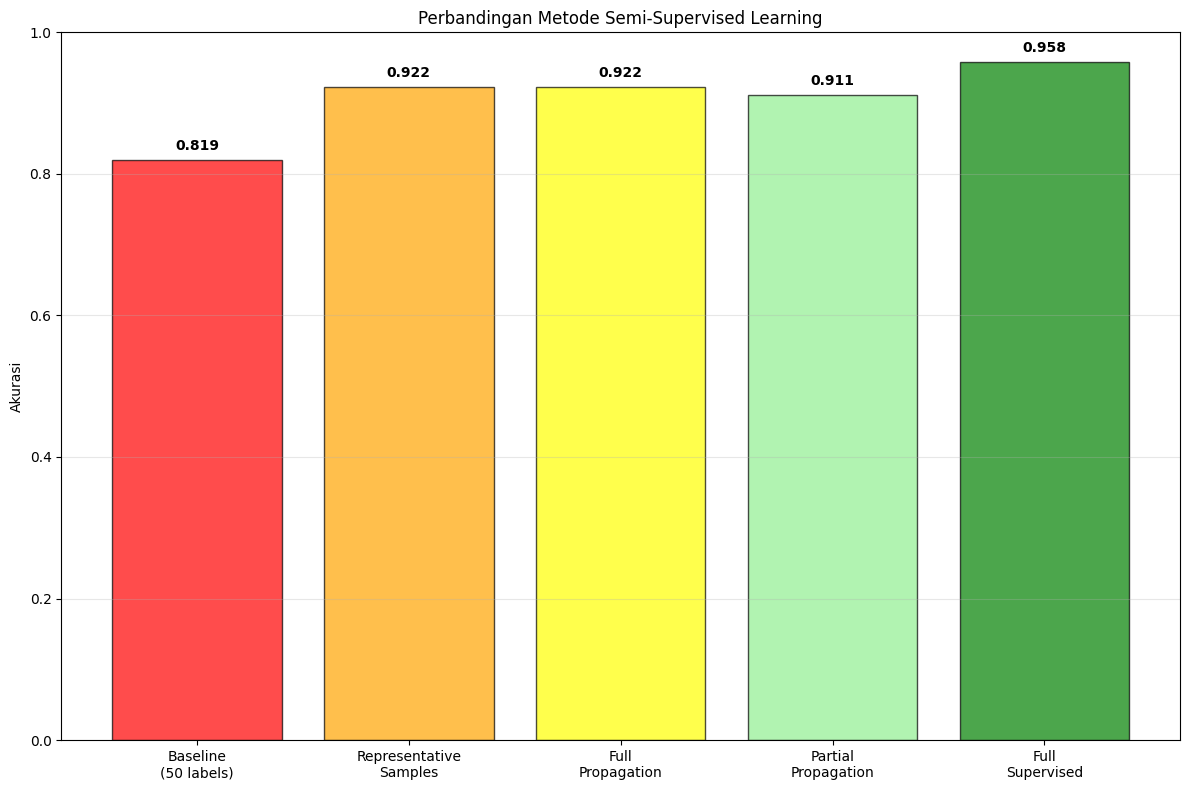


=== Analisis Kualitas Label Propagation ===
Akurasi label propagation (full): 0.955
Akurasi label propagation (partial): 0.990
Jumlah data berlabel setelah full propagation: 1437/1437 (100.0%)
Jumlah data berlabel setelah partial propagation: 308/1437 (21.4%)


In [49]:
# Semi-supervised learning dengan clustering
print("=== Semi-Supervised Learning dengan Clustering ===")

# Simulasi skenario dengan sedikit label
n_labeled = 50  # Hanya 50 dari ~1400 sample yang berlabel

# Ambil subset kecil yang berlabel
X_labeled = X_train[:n_labeled]
y_labeled = y_train[:n_labeled]

print(f"Dataset asli: {X_train.shape[0]} samples")
print(f"Data berlabel: {n_labeled} samples ({n_labeled/X_train.shape[0]*100:.1f}%)")

# Baseline: hanya menggunakan data berlabel
log_reg_small = LogisticRegression(max_iter=1000, random_state=42)
log_reg_small.fit(X_labeled, y_labeled)
small_score = log_reg_small.score(X_test, y_test)

print(f"\nBaseline (hanya {n_labeled} label): {small_score:.4f}")

# Metode 1: Clustering untuk memilih representative samples
print("\n=== Metode 1: Representative Samples ===")

k = 50  # Jumlah cluster
kmeans_repr = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit pada seluruh training data (termasuk yang unlabeled)
X_train_dist = kmeans_repr.fit_transform(X_train)

# Temukan sample terdekat dengan setiap centroid
representative_indices = np.argmin(X_train_dist, axis=0)
X_representative = X_train[representative_indices]

# Simulasi labeling manual untuk representative samples
y_representative = y_train[representative_indices]  # Dalam praktik, ini dilakukan manual

print(f"Jumlah representative samples: {len(X_representative)}")

# Train model dengan representative samples
log_reg_repr = LogisticRegression(max_iter=1000, random_state=42)
log_reg_repr.fit(X_representative, y_representative)
repr_score = log_reg_repr.score(X_test, y_test)

print(f"Akurasi dengan representative samples: {repr_score:.4f}")
print(f"Peningkatan: {repr_score - small_score:+.4f}")

# Metode 2: Label Propagation
print("\n=== Metode 2: Label Propagation ===")

# Propagasi label ke semua instance dalam cluster yang sama
y_train_propagated = np.full(len(X_train), -1)  # -1 untuk unlabeled

# Assign label dari representative samples ke seluruh cluster
cluster_labels = kmeans_repr.labels_
for i in range(k):
    cluster_mask = cluster_labels == i
    if i < len(y_representative):  # Pastikan ada representative untuk cluster ini
        y_train_propagated[cluster_mask] = y_representative[i]

# Train dengan semua data yang sudah dipropagasi
labeled_mask = y_train_propagated != -1
X_train_propagated = X_train[labeled_mask]
y_train_propagated_clean = y_train_propagated[labeled_mask]

log_reg_prop = LogisticRegression(max_iter=1000, random_state=42)
log_reg_prop.fit(X_train_propagated, y_train_propagated_clean)
prop_score = log_reg_prop.score(X_test, y_test)

print(f"Data setelah propagasi: {len(X_train_propagated)} samples")
print(f"Akurasi dengan label propagation: {prop_score:.4f}")
print(f"Peningkatan: {prop_score - small_score:+.4f}")

# Metode 3: Partial Label Propagation (hanya propagasi ke samples terdekat centroid)
print("\n=== Metode 3: Partial Label Propagation ===")

percentile_closest = 20  # Hanya propagasi ke 20% terdekat
y_train_partial = np.full(len(X_train), -1)

# Untuk setiap cluster, hanya propagasi ke samples yang dekat dengan centroid
X_cluster_dist = X_train_dist[np.arange(len(X_train)), cluster_labels]

for i in range(k):
    cluster_mask = cluster_labels == i
    if i < len(y_representative) and np.sum(cluster_mask) > 0:
        cluster_distances = X_cluster_dist[cluster_mask]
        
        # Hitung threshold untuk percentile terdekat
        cutoff_distance = np.percentile(cluster_distances, percentile_closest)
        
        # Hanya instance yang dekat dengan centroid yang diberi label
        close_to_centroid = (cluster_mask) & (X_cluster_dist <= cutoff_distance)
        y_train_partial[close_to_centroid] = y_representative[i]

# Train dengan partial propagation
partial_labeled_mask = y_train_partial != -1
X_train_partial = X_train[partial_labeled_mask]
y_train_partial_clean = y_train_partial[partial_labeled_mask]

log_reg_partial = LogisticRegression(max_iter=1000, random_state=42)
log_reg_partial.fit(X_train_partial, y_train_partial_clean)
partial_score = log_reg_partial.score(X_test, y_test)

print(f"Data setelah partial propagation: {len(X_train_partial)} samples")
print(f"Akurasi dengan partial propagation: {partial_score:.4f}")
print(f"Peningkatan: {partial_score - small_score:+.4f}")

# Ringkasan hasil
print("\n" + "="*50)
print("RINGKASAN SEMI-SUPERVISED LEARNING")
print("="*50)
print(f"Baseline ({n_labeled} labels):        {small_score:.4f}")
print(f"Representative samples:        {repr_score:.4f} ({repr_score-small_score:+.4f})")
print(f"Full label propagation:        {prop_score:.4f} ({prop_score-small_score:+.4f})")
print(f"Partial label propagation:     {partial_score:.4f} ({partial_score-small_score:+.4f})")
print(f"Supervised baseline (full):    {baseline_score:.4f}")

# Visualisasi hasil
methods = ['Baseline\n(50 labels)', 'Representative\nSamples', 'Full\nPropagation', 'Partial\nPropagation', 'Full\nSupervised']
scores = [small_score, repr_score, prop_score, partial_score, baseline_score]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']

plt.figure(figsize=(12, 8))
bars = plt.bar(methods, scores, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Akurasi')
plt.title('Perbandingan Metode Semi-Supervised Learning')
plt.ylim(0, 1)

# Tambahkan nilai di atas setiap bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Analisis kualitas propagasi
print("\n=== Analisis Kualitas Label Propagation ===")
# Hitung akurasi propagasi (membandingkan dengan label sebenarnya)
full_prop_accuracy = np.mean(y_train_propagated_clean == y_train[labeled_mask])
partial_prop_accuracy = np.mean(y_train_partial_clean == y_train[partial_labeled_mask])

print(f"Akurasi label propagation (full): {full_prop_accuracy:.3f}")
print(f"Akurasi label propagation (partial): {partial_prop_accuracy:.3f}")
print(f"Jumlah data berlabel setelah full propagation: {len(y_train_propagated_clean)}/{len(X_train)} ({len(y_train_propagated_clean)/len(X_train)*100:.1f}%)")
print(f"Jumlah data berlabel setelah partial propagation: {len(y_train_partial_clean)}/{len(X_train)} ({len(y_train_partial_clean)/len(X_train)*100:.1f}%)")

## 9.7 DBSCAN (Density-Based Spatial Clustering)

DBSCAN adalah algoritma clustering yang berbasis kepadatan. Berbeda dengan K-Means, DBSCAN dapat menemukan cluster dengan bentuk arbitrer dan secara otomatis menentukan jumlah cluster.

### Konsep Utama DBSCAN:
- **Core Point**: Instance yang memiliki minimal `min_samples` tetangga dalam radius `eps`
- **Border Point**: Instance yang bukan core point tetapi berada dalam neighborhood core point
- **Noise Point**: Instance yang bukan core point dan tidak berada dalam neighborhood core point

### Keuntungan DBSCAN:
- Tidak perlu menentukan jumlah cluster
- Dapat menemukan cluster dengan bentuk arbitrer
- Robust terhadap outlier
- Dapat mengidentifikasi noise

### Parameter:
- **eps**: Radius neighborhood
- **min_samples**: Minimum jumlah instance dalam neighborhood

=== DBSCAN Clustering ===
Dataset shape: (300, 2)


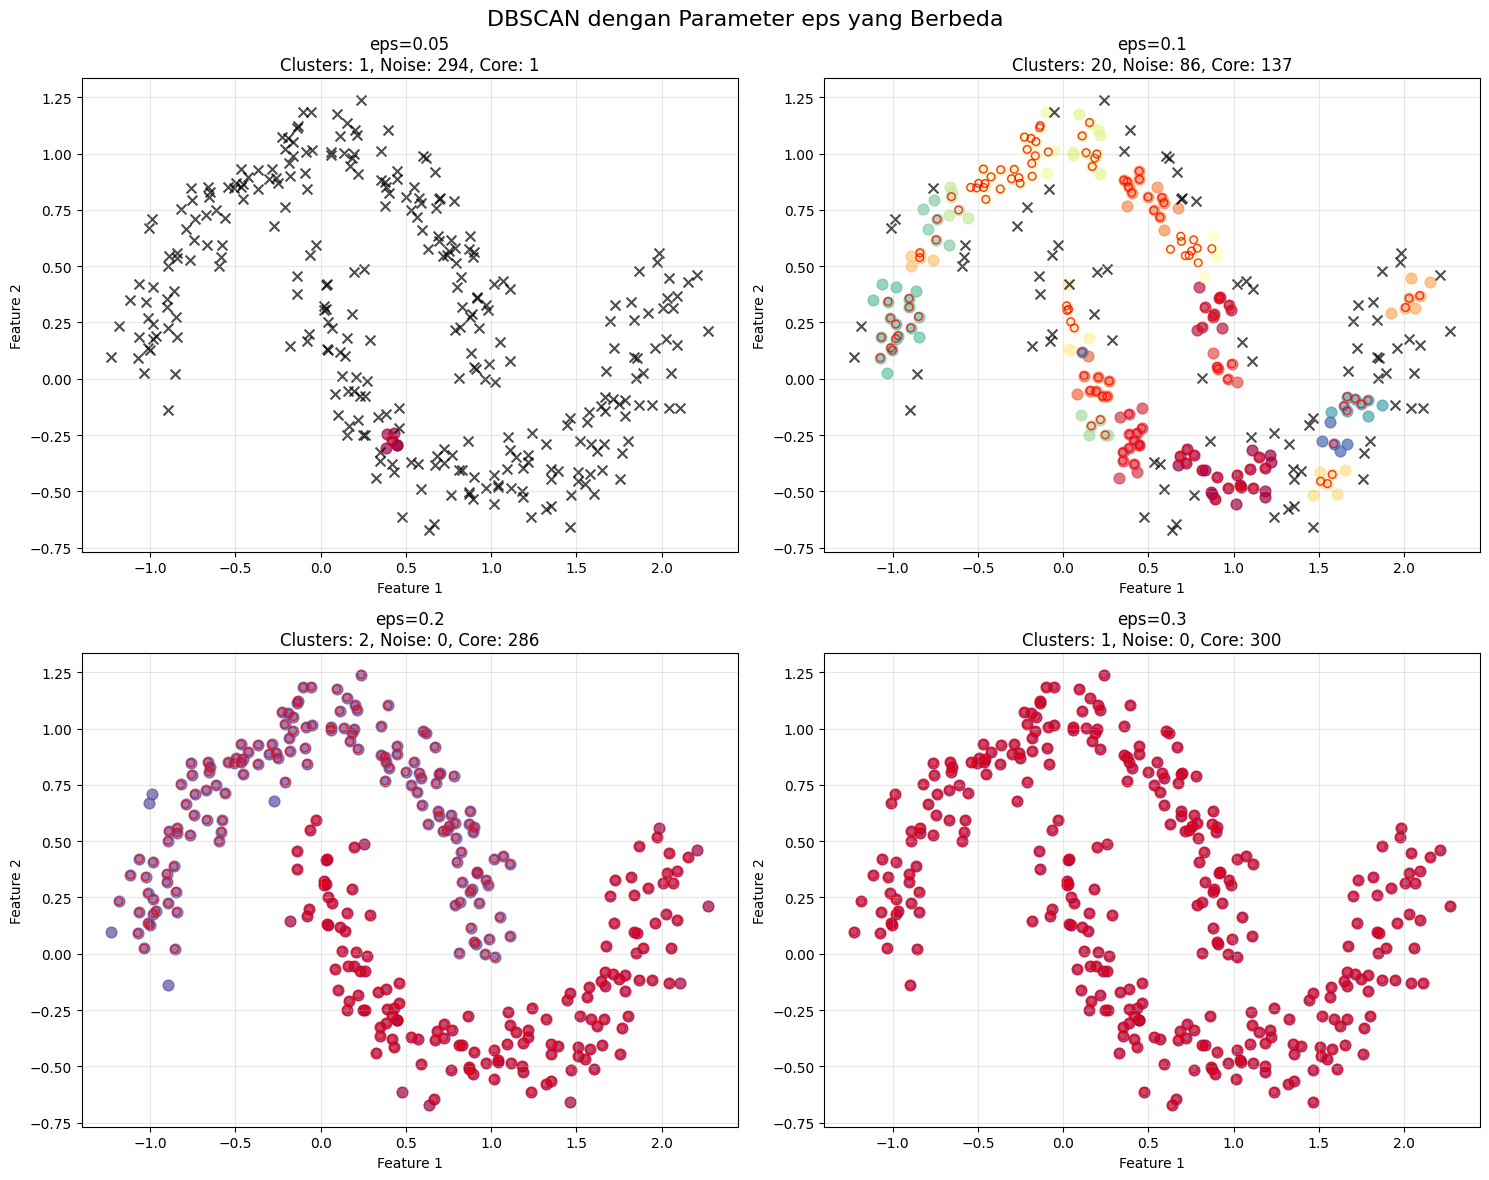


=== Hasil DBSCAN untuk Berbagai Parameter ===
eps	Clusters	Noise	Core Samples
----------------------------------------
0.05	1		294	1
0.10	20		86	137
0.20	2		0	286
0.30	1		0	300

=== Analisis DBSCAN Optimal (eps=0.2) ===
Jumlah cluster: 2
Jumlah noise points: 0
Jumlah core samples: 286
Core sample indices: [0 1 2 3 4 5 6 7 8 9]...
Silhouette score (tanpa noise): 0.324

=== Perbandingan DBSCAN vs K-Means pada Dataset Moons ===


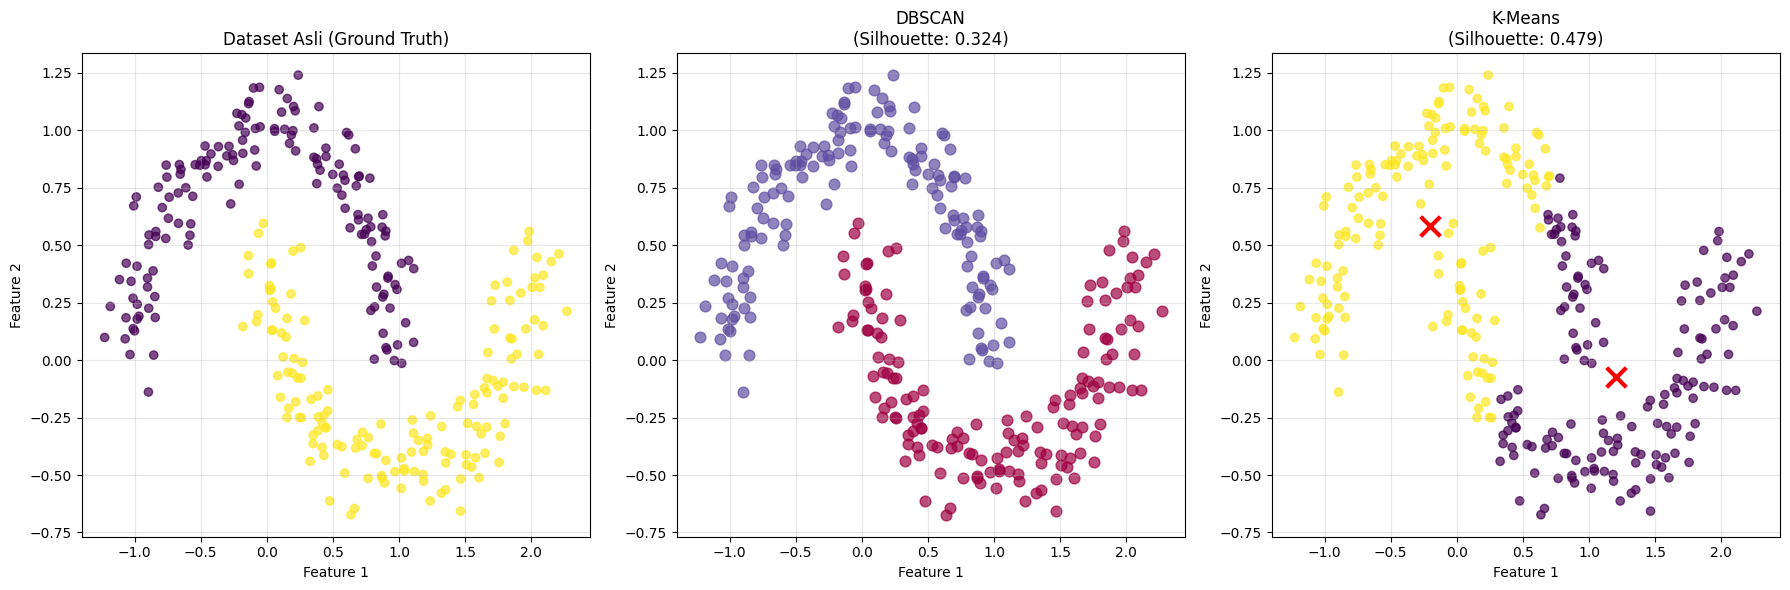

DBSCAN Silhouette Score: 0.324
K-Means Silhouette Score: 0.479

DBSCAN lebih baik untuk cluster non-spherical seperti dataset moons


In [50]:
# Demonstrasi DBSCAN
from sklearn.datasets import make_moons

# Dataset moons (non-spherical clusters)
X_moons, y_moons_true = make_moons(n_samples=300, noise=0.1, random_state=42)

print("=== DBSCAN Clustering ===")
print(f"Dataset shape: {X_moons.shape}")

# Coba berbagai parameter eps
eps_values = [0.05, 0.1, 0.2, 0.3]
min_samples = 5

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('DBSCAN dengan Parameter eps yang Berbeda', fontsize=16)

results_dbscan = []

for idx, eps in enumerate(eps_values):
    ax = axes[idx//2, idx%2]
    
    # Fit DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X_moons)
    
    # Hitung statistik
    n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
    n_noise = list(y_pred).count(-1)
    n_core = len(dbscan.core_sample_indices_)
    
    results_dbscan.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'n_core': n_core,
        'labels': y_pred
    })
    
    # Plot
    unique_labels = set(y_pred)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Noise points (hitam)
            col = [0, 0, 0, 1]
            marker = 'x'
            size = 50
        else:
            marker = 'o'
            size = 60
        
        class_member_mask = (y_pred == k)
        xy = X_moons[class_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=0.7)
    
    # Highlight core samples
    if len(dbscan.core_sample_indices_) > 0:
        ax.scatter(X_moons[dbscan.core_sample_indices_, 0], 
                  X_moons[dbscan.core_sample_indices_, 1],
                  s=30, facecolors='none', edgecolors='red', linewidths=1, alpha=0.8)
    
    ax.set_title(f'eps={eps}\nClusters: {n_clusters}, Noise: {n_noise}, Core: {n_core}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabel hasil
print("\n=== Hasil DBSCAN untuk Berbagai Parameter ===")
print("eps\tClusters\tNoise\tCore Samples")
print("-" * 40)
for result in results_dbscan:
    print(f"{result['eps']:.2f}\t{result['n_clusters']}\t\t{result['n_noise']}\t{result['n_core']}")

# DBSCAN optimal (eps=0.2)
print("\n=== Analisis DBSCAN Optimal (eps=0.2) ===")
dbscan_optimal = DBSCAN(eps=0.2, min_samples=5)
y_optimal = dbscan_optimal.fit_predict(X_moons)

print(f"Jumlah cluster: {len(set(y_optimal)) - (1 if -1 in y_optimal else 0)}")
print(f"Jumlah noise points: {list(y_optimal).count(-1)}")
print(f"Jumlah core samples: {len(dbscan_optimal.core_sample_indices_)}")
print(f"Core sample indices: {dbscan_optimal.core_sample_indices_[:10]}...")  # Show first 10

# Silhouette score (exclude noise points)
mask_non_noise = y_optimal != -1
if len(set(y_optimal[mask_non_noise])) > 1:
    silhouette_dbscan = silhouette_score(X_moons[mask_non_noise], y_optimal[mask_non_noise])
    print(f"Silhouette score (tanpa noise): {silhouette_dbscan:.3f}")

# Perbandingan dengan K-Means pada dataset yang sama
print("\n=== Perbandingan DBSCAN vs K-Means pada Dataset Moons ===")
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans_moons = kmeans_moons.fit_predict(X_moons)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Dataset asli
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons_true, cmap='viridis', alpha=0.7)
axes[0].set_title('Dataset Asli (Ground Truth)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# DBSCAN
unique_labels = set(y_optimal)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        marker = 'x'
    else:
        marker = 'o'
    
    class_member_mask = (y_optimal == k)
    xy = X_moons[class_member_mask]
    axes[1].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=60, alpha=0.7)

axes[1].set_title(f'DBSCAN\n(Silhouette: {silhouette_dbscan:.3f})')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

# K-Means
axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, cmap='viridis', alpha=0.7)
axes[2].scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1], 
               c='red', marker='x', s=200, linewidths=3)
silhouette_kmeans_moons = silhouette_score(X_moons, y_kmeans_moons)
axes[2].set_title(f'K-Means\n(Silhouette: {silhouette_kmeans_moons:.3f})')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.3f}")
print(f"K-Means Silhouette Score: {silhouette_kmeans_moons:.3f}")
print("\nDBSCAN lebih baik untuk cluster non-spherical seperti dataset moons")

### DBSCAN untuk Prediksi

DBSCAN tidak memiliki method `predict()` karena sifatnya yang berbasis kepadatan. Untuk memprediksi cluster instance baru, kita dapat menggunakan classifier tambahan.

=== Membuat Classifier untuk DBSCAN ===
Training classifier dengan 286 core samples
Distribusi cluster pada core samples: [141 145]

=== Prediksi untuk Instance Baru ===
Instance 0: [-0.5  0. ] -> Cluster 1
  Probabilitas: [0.2 0.8]
Instance 1: [0.  0.5] -> Cluster 0
  Probabilitas: [1. 0.]
Instance 2: [ 1.  -0.1] -> Cluster 1
  Probabilitas: [0. 1.]
Instance 3: [2. 1.] -> Cluster 0
  Probabilitas: [1. 0.]

=== Deteksi Anomali Berdasarkan Jarak ===
Distance threshold: 0.3
Instance 0: [-0.5  0. ] -> ANOMALI (distance: 0.357, cluster: -1)
Instance 1: [0.  0.5] -> NORMAL (distance: 0.081, cluster: 0)
Instance 2: [ 1.  -0.1] -> NORMAL (distance: 0.088, cluster: 1)
Instance 3: [2. 1.] -> ANOMALI (distance: 0.482, cluster: -1)


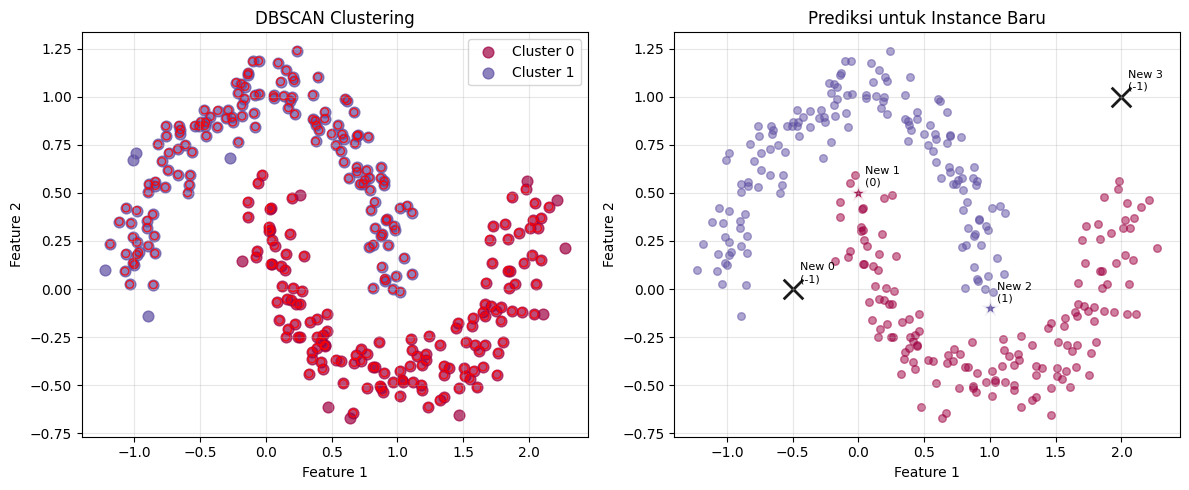


Prediksi final: [-1, np.int64(0), np.int64(1), -1]
Keterangan: -1 = Anomali, 0,1,... = Cluster


In [51]:
# Membuat classifier untuk prediksi DBSCAN
print("=== Membuat Classifier untuk DBSCAN ===")

# Gunakan DBSCAN optimal
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)

# Train KNN classifier pada core samples saja
# (menghindari noise points untuk training yang lebih bersih)
core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Filter out noise points (-1) dari core samples
valid_core_mask = core_samples_mask & (y_dbscan != -1)

X_core = X_moons[valid_core_mask]
y_core = y_dbscan[valid_core_mask]

print(f"Training classifier dengan {len(X_core)} core samples")
print(f"Distribusi cluster pada core samples: {np.bincount(y_core)}")

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_core, y_core)

# Test dengan instance baru
X_new_moons = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

print(f"\n=== Prediksi untuk Instance Baru ===")
y_new_pred = knn.predict(X_new_moons)
y_new_proba = knn.predict_proba(X_new_moons)

for i, (instance, pred, proba) in enumerate(zip(X_new_moons, y_new_pred, y_new_proba)):
    print(f"Instance {i}: {instance} -> Cluster {pred}")
    print(f"  Probabilitas: {proba}")

# Implementasi deteksi anomali berdasarkan jarak
print(f"\n=== Deteksi Anomali Berdasarkan Jarak ===")
distances, indices = knn.kneighbors(X_new_moons, n_neighbors=1)
distance_threshold = 0.3  # Threshold untuk mendeteksi anomali

print(f"Distance threshold: {distance_threshold}")
for i, (instance, pred, dist) in enumerate(zip(X_new_moons, y_new_pred, distances.flatten())):
    if dist > distance_threshold:
        final_pred = -1  # Anomali
        status = "ANOMALI"
    else:
        final_pred = pred
        status = "NORMAL"
    
    print(f"Instance {i}: {instance} -> {status} (distance: {dist:.3f}, cluster: {final_pred})")

# Visualisasi prediksi
plt.figure(figsize=(12, 5))

# Plot 1: DBSCAN clustering asli
plt.subplot(1, 2, 1)
unique_labels = set(y_dbscan)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'
    
    class_member_mask = (y_dbscan == k)
    xy = X_moons[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=60, alpha=0.7, label=label)

# Highlight core samples
plt.scatter(X_moons[dbscan.core_sample_indices_, 0], 
           X_moons[dbscan.core_sample_indices_, 1],
           s=30, facecolors='none', edgecolors='red', linewidths=1, alpha=0.8)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Prediksi untuk instance baru
plt.subplot(1, 2, 2)

# Plot data asli (lebih transparan)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 0.3]
        marker = 'x'
    else:
        col = list(col[:3]) + [0.3]
        marker = 'o'
    
    class_member_mask = (y_dbscan == k)
    xy = X_moons[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=30, alpha=0.5)

# Plot instance baru dengan prediksi
final_predictions = []
for i, (instance, pred, dist) in enumerate(zip(X_new_moons, y_new_pred, distances.flatten())):
    if dist > distance_threshold:
        final_pred = -1
        color = 'black'
        marker = 'x'
        size = 200
    else:
        final_pred = pred
        color = colors[pred] if pred < len(colors) else 'gray'
        marker = '*'
        size = 200
    
    final_predictions.append(final_pred)
    plt.scatter(instance[0], instance[1], c=[color], marker=marker, s=size, 
               edgecolors='white', linewidths=2, alpha=0.9)
    plt.annotate(f'New {i}\n({final_pred})', (instance[0], instance[1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title('Prediksi untuk Instance Baru')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPrediksi final: {final_predictions}")
print("Keterangan: -1 = Anomali, 0,1,... = Cluster")

## 9.8 Gaussian Mixture Models (GMM)

Gaussian Mixture Model adalah model probabilistik yang mengasumsikan bahwa data dihasilkan dari campuran beberapa distribusi Gaussian. GMM dapat digunakan untuk clustering, density estimation, dan anomaly detection.

### Keuntungan GMM:
- Soft clustering (memberikan probabilitas keanggotaan cluster)
- Dapat menangani cluster dengan bentuk ellipsoidal
- Dapat digunakan untuk density estimation
- Generative model (dapat menghasilkan data baru)

### Expectation-Maximization (EM) Algorithm:
1. **Expectation Step**: Hitung probabilitas setiap instance terhadap setiap cluster
2. **Maximization Step**: Update parameter cluster berdasarkan probabilitas tersebut
3. Ulangi hingga konvergen

=== Gaussian Mixture Models ===
Dataset shape: (600, 2)

=== Parameter GMM ===
Converged: True
Iterations: 5
Log-likelihood: -3.31

Weights (mixing coefficients): [0.35800652 0.32840482 0.31358866]

Means:
  Cluster 0: (1.16, -1.93)
  Cluster 1: (2.02, 2.04)
  Cluster 2: (-1.06, -1.00)

Covariances:
  Cluster 0:
    [[1.021, -0.080],
     [-0.080, 0.342]]
  Cluster 1:
    [[1.315, 0.420],
     [0.420, 0.432]]
  Cluster 2:
    [[0.681, -0.251],
     [-0.251, 0.855]]

=== Clustering Results ===
Cluster 0: 213 instances (35.5%)
Cluster 1: 196 instances (32.7%)
Cluster 2: 191 instances (31.8%)


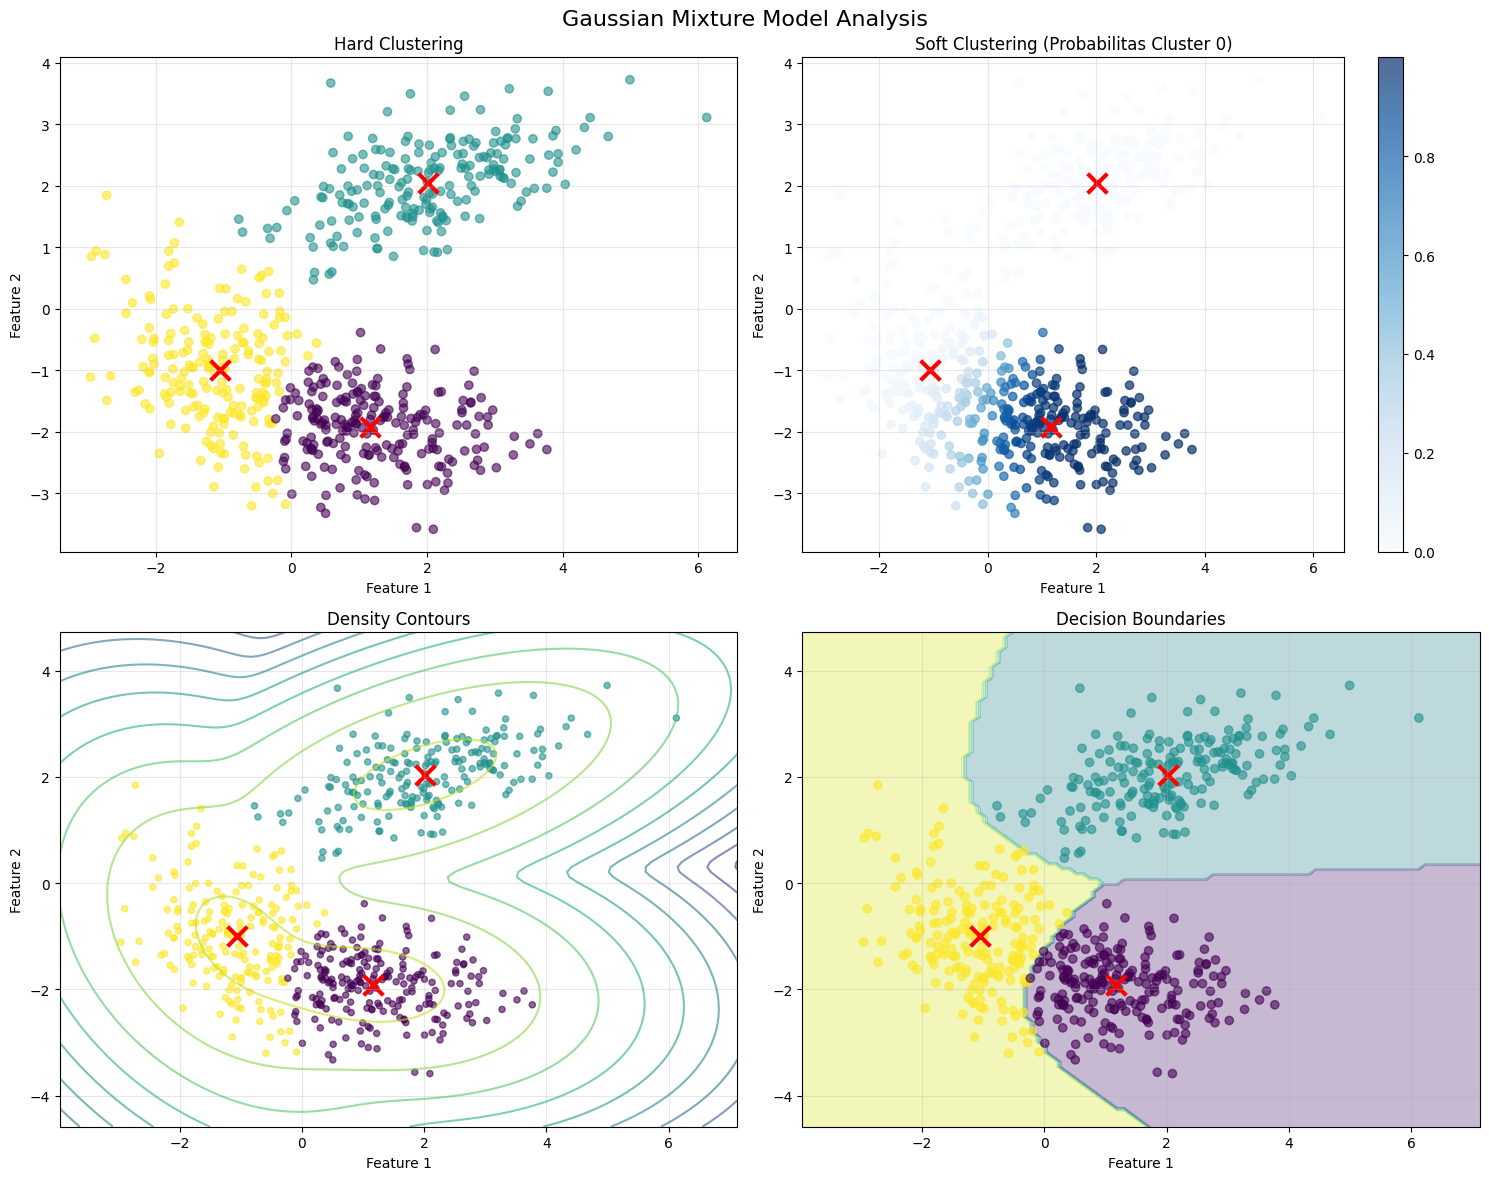


=== Generative Capabilities ===
Sampel baru yang dihasilkan:
Sample 0: (0.61, -0.98) dari cluster 0
Sample 1: (1.38, -2.09) dari cluster 0
Sample 2: (-0.38, -1.30) dari cluster 0
Sample 3: (2.44, 2.51) dari cluster 1
Sample 4: (-1.05, -1.58) dari cluster 2
Sample 5: (-2.31, -1.59) dari cluster 2
Sample 6: (-0.37, -2.67) dari cluster 2
Sample 7: (-0.28, -1.72) dari cluster 2
Sample 8: (-1.34, -2.34) dari cluster 2
Sample 9: (-2.05, 0.12) dari cluster 2


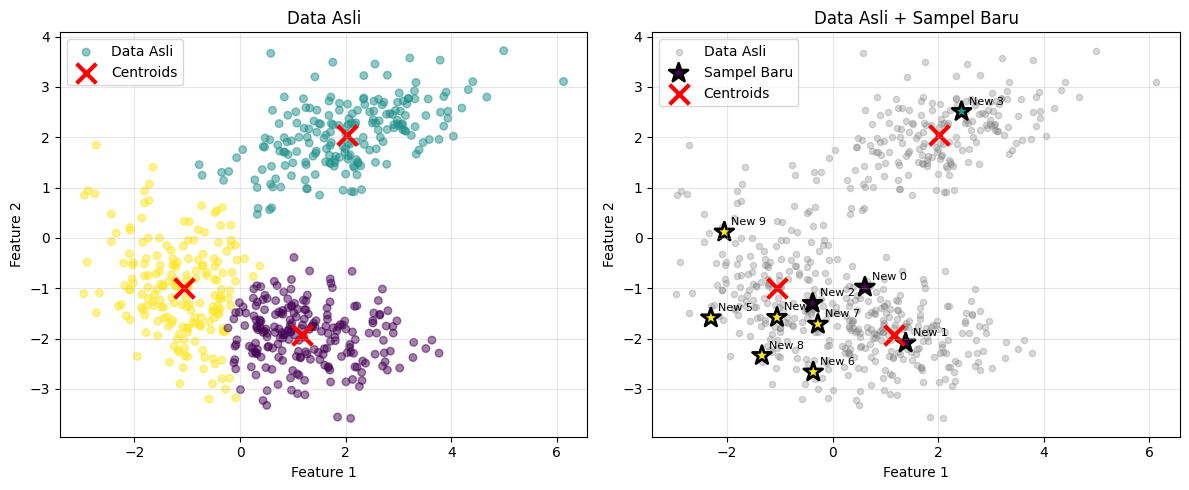


=== Density Estimation ===
Evaluasi density untuk test points:
Point 0: [2 2] -> Log-density: -1.644, Density: 0.193135
Point 1: [-1 -1] -> Log-density: -1.765, Density: 0.171253
Point 2: [ 1 -2] -> Log-density: -1.457, Density: 0.232847
Point 3: [5 5] -> Log-density: -11.644, Density: 0.000009
Point 4: [0 0] -> Log-density: -3.700, Density: 0.024725

=== Perbandingan Covariance Types ===


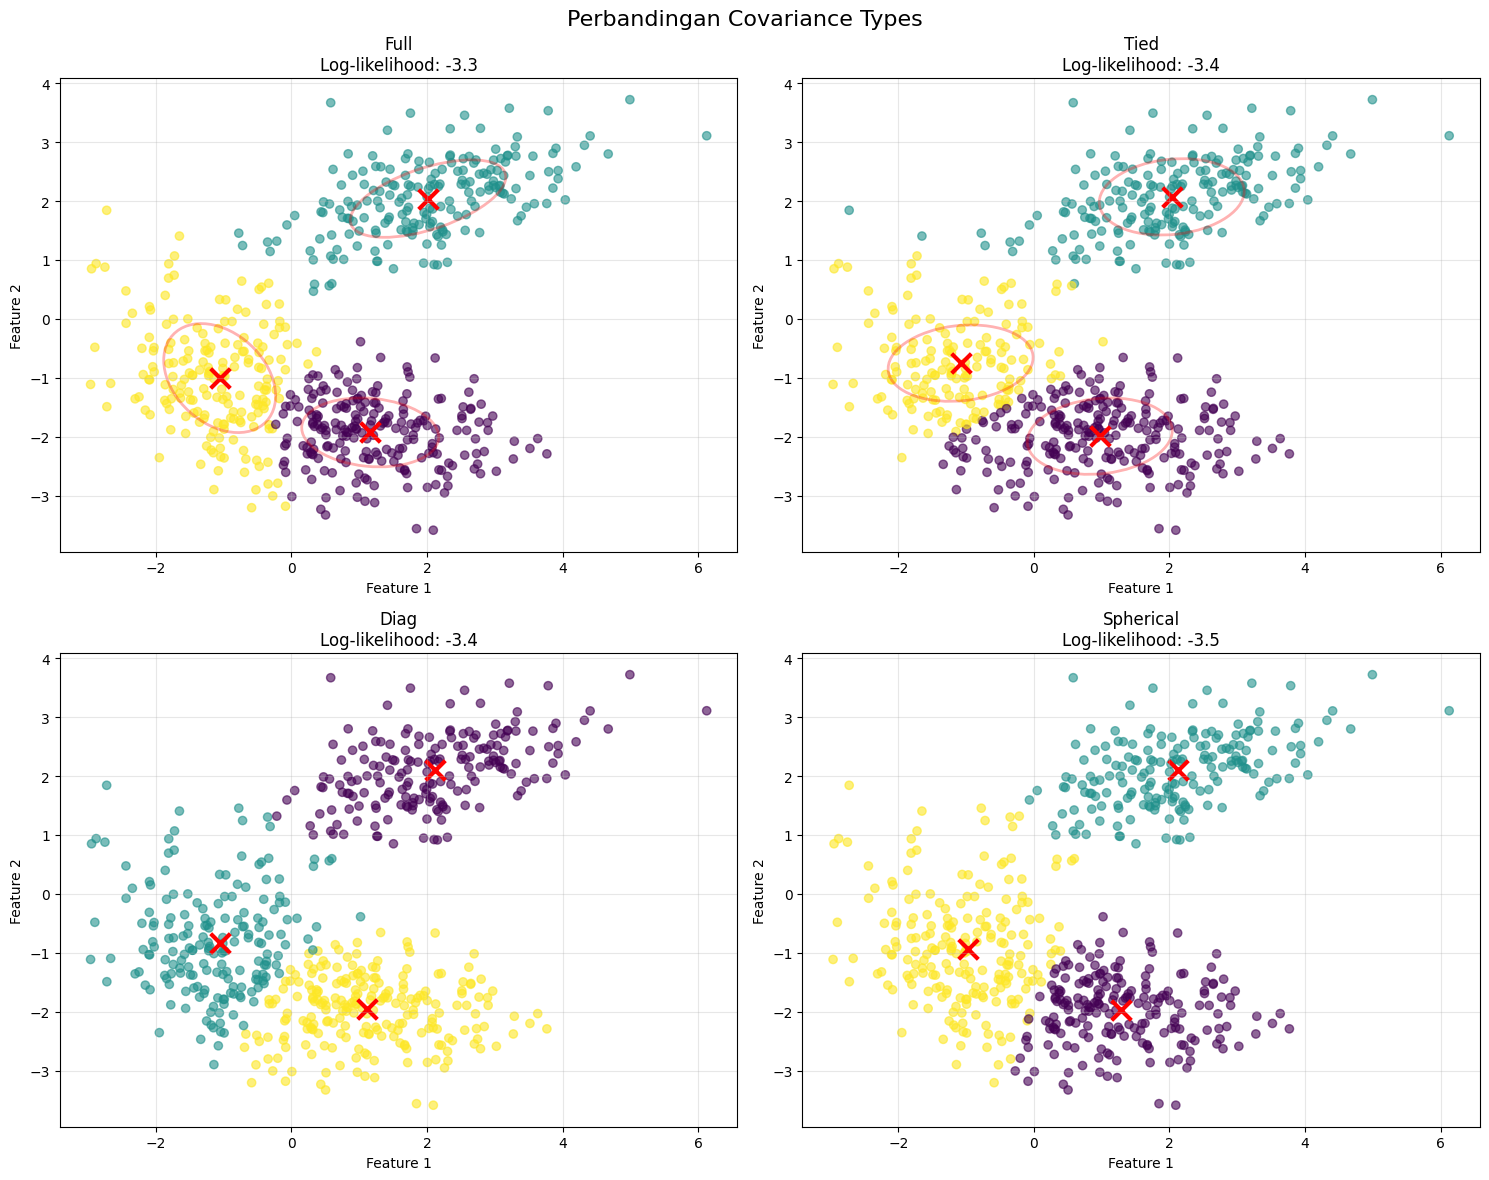


Perbandingan Model Selection Metrics:
Type		Log-Likelihood	AIC		BIC		Parameters
----------------------------------------------------------------------
full        	-3.3		4009.1	4083.8	17
tied        	-3.4		4104.7	4153.1	11
diag        	-3.4		4073.7	4135.3	14
spherical   	-3.5		4174.1	4222.4	11

Keterangan:
- Lower AIC/BIC = Better model
- Full: Setiap cluster memiliki covariance matrix sendiri
- Tied: Semua cluster berbagi covariance matrix yang sama
- Diag: Covariance matrix diagonal (tidak ada korelasi antar fitur)
- Spherical: Covariance matrix diagonal dengan variance sama untuk semua fitur


In [52]:
# Demonstrasi Gaussian Mixture Models
print("=== Gaussian Mixture Models ===")

# Buat dataset dengan cluster ellipsoidal
np.random.seed(42)
X_ellipsoid = np.vstack([
    np.random.multivariate_normal([2, 2], [[1.5, 0.5], [0.5, 0.5]], 200),
    np.random.multivariate_normal([-1, -1], [[0.8, -0.3], [-0.3, 0.8]], 200),
    np.random.multivariate_normal([1, -2], [[1.2, 0], [0, 0.3]], 200)
])

print(f"Dataset shape: {X_ellipsoid.shape}")

# Fit Gaussian Mixture Model
n_components = 3
gm = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
gm.fit(X_ellipsoid)

print(f"\n=== Parameter GMM ===")
print(f"Converged: {gm.converged_}")
print(f"Iterations: {gm.n_iter_}")
print(f"Log-likelihood: {gm.score(X_ellipsoid):.2f}")

print(f"\nWeights (mixing coefficients): {gm.weights_}")
print(f"\nMeans:")
for i, mean in enumerate(gm.means_):
    print(f"  Cluster {i}: ({mean[0]:.2f}, {mean[1]:.2f})")

print(f"\nCovariances:")
for i, cov in enumerate(gm.covariances_):
    print(f"  Cluster {i}:")
    print(f"    [[{cov[0,0]:.3f}, {cov[0,1]:.3f}],")
    print(f"     [{cov[1,0]:.3f}, {cov[1,1]:.3f}]]")

# Prediksi cluster dan probabilitas
y_pred_gmm = gm.predict(X_ellipsoid)
y_proba_gmm = gm.predict_proba(X_ellipsoid)

print(f"\n=== Clustering Results ===")
unique, counts = np.unique(y_pred_gmm, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} instances ({count/len(X_ellipsoid)*100:.1f}%)")

# Visualisasi GMM
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Gaussian Mixture Model Analysis', fontsize=16)

# Plot 1: Hard clustering
axes[0, 0].scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_pred_gmm, cmap='viridis', alpha=0.6)
axes[0, 0].scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', s=200, linewidths=3)
axes[0, 0].set_title('Hard Clustering')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Soft clustering (probabilitas untuk cluster 0)
scatter = axes[0, 1].scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_proba_gmm[:, 0], 
                           cmap='Blues', alpha=0.7)
axes[0, 1].scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.colorbar(scatter, ax=axes[0, 1])
axes[0, 1].set_title('Soft Clustering (Probabilitas Cluster 0)')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Density contours
x_min, x_max = X_ellipsoid[:, 0].min() - 1, X_ellipsoid[:, 0].max() + 1
y_min, y_max = X_ellipsoid[:, 1].min() - 1, X_ellipsoid[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
mesh_points = np.array([xx.ravel(), yy.ravel()]).T

# Hitung log probability density
log_prob = gm.score_samples(mesh_points)
log_prob = log_prob.reshape(xx.shape)

axes[1, 0].contour(xx, yy, log_prob, levels=10, alpha=0.6)
axes[1, 0].scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_pred_gmm, cmap='viridis', alpha=0.6, s=20)
axes[1, 0].scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', s=200, linewidths=3)
axes[1, 0].set_title('Density Contours')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Decision boundaries
decision_boundary = gm.predict(mesh_points)
decision_boundary = decision_boundary.reshape(xx.shape)
axes[1, 1].contourf(xx, yy, decision_boundary, alpha=0.3, cmap='viridis')
axes[1, 1].scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_pred_gmm, cmap='viridis', alpha=0.6)
axes[1, 1].scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', s=200, linewidths=3)
axes[1, 1].set_title('Decision Boundaries')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Generative capabilities dari GMM
print("\n=== Generative Capabilities ===")

# Generate sampel baru
X_new_generated, y_new_generated = gm.sample(10)

print("Sampel baru yang dihasilkan:")
for i, (sample, cluster) in enumerate(zip(X_new_generated, y_new_generated)):
    print(f"Sample {i}: ({sample[0]:.2f}, {sample[1]:.2f}) dari cluster {cluster}")

# Visualisasi sampel yang dihasilkan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Data asli
plt.scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_pred_gmm, cmap='viridis', alpha=0.5, s=30, label='Data Asli')
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('Data Asli')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Data asli (transparan) + sampel baru
plt.scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c='gray', alpha=0.3, s=20, label='Data Asli')
plt.scatter(X_new_generated[:, 0], X_new_generated[:, 1], c=y_new_generated, 
           cmap='viridis', s=200, marker='*', edgecolors='black', linewidths=2, 
           label='Sampel Baru')
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')

# Annotate sampel baru
for i, (x, y) in enumerate(X_new_generated):
    plt.annotate(f'New {i}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title('Data Asli + Sampel Baru')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Density estimation
print("\n=== Density Estimation ===")

# Contoh instance untuk evaluasi density
test_points = np.array([
    [2, 2],      # Dekat cluster 0 center
    [-1, -1],    # Dekat cluster 1 center
    [1, -2],     # Dekat cluster 2 center
    [5, 5],      # Jauh dari semua cluster
    [0, 0]       # Di tengah
])

log_densities = gm.score_samples(test_points)
densities = np.exp(log_densities)

print("Evaluasi density untuk test points:")
for i, (point, log_density, density) in enumerate(zip(test_points, log_densities, densities)):
    print(f"Point {i}: {point} -> Log-density: {log_density:.3f}, Density: {density:.6f}")

# Perbandingan covariance types
print("\n=== Perbandingan Covariance Types ===")

covariance_types = ['full', 'tied', 'diag', 'spherical']
gm_results = {}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Perbandingan Covariance Types', fontsize=16)

for idx, cov_type in enumerate(covariance_types):
    ax = axes[idx//2, idx%2]
    
    # Fit GMM dengan covariance type berbeda
    gm_cov = GaussianMixture(n_components=3, covariance_type=cov_type, 
                            random_state=42, n_init=10)
    gm_cov.fit(X_ellipsoid)
    
    y_pred_cov = gm_cov.predict(X_ellipsoid)
    
    # Simpan hasil
    gm_results[cov_type] = {
        'model': gm_cov,
        'log_likelihood': gm_cov.score(X_ellipsoid),
        'aic': gm_cov.aic(X_ellipsoid),
        'bic': gm_cov.bic(X_ellipsoid),
        'n_parameters': gm_cov._n_parameters()
    }
    
    # Plot
    ax.scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_pred_cov, cmap='viridis', alpha=0.6)
    ax.scatter(gm_cov.means_[:, 0], gm_cov.means_[:, 1], c='red', marker='x', s=200, linewidths=3)
    
    # Tambahkan ellipse untuk setiap cluster (hanya untuk 'full' dan 'tied')
    if cov_type in ['full', 'tied']:
        from matplotlib.patches import Ellipse
        for i in range(n_components):
            if cov_type == 'tied':
                cov = gm_cov.covariances_
            else:
                cov = gm_cov.covariances_[i]
            
            # Eigenvalue dan eigenvector untuk ellipse
            eigenvals, eigenvecs = np.linalg.eigh(cov)
            angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
            
            # Ellipse untuk 2 standard deviations
            ellipse = Ellipse(gm_cov.means_[i], 2*np.sqrt(eigenvals[0]), 2*np.sqrt(eigenvals[1]),
                             angle=angle, alpha=0.3, facecolor='none', edgecolor='red', linewidth=2)
            ax.add_patch(ellipse)
    
    ax.set_title(f'{cov_type.title()}\nLog-likelihood: {gm_cov.score(X_ellipsoid):.1f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabel perbandingan
print("\nPerbandingan Model Selection Metrics:")
print("Type\t\tLog-Likelihood\tAIC\t\tBIC\t\tParameters")
print("-" * 70)
for cov_type, results in gm_results.items():
    print(f"{cov_type:<12}\t{results['log_likelihood']:.1f}\t\t{results['aic']:.1f}\t{results['bic']:.1f}\t{results['n_parameters']}")

print("\nKeterangan:")
print("- Lower AIC/BIC = Better model")
print("- Full: Setiap cluster memiliki covariance matrix sendiri")
print("- Tied: Semua cluster berbagi covariance matrix yang sama")  
print("- Diag: Covariance matrix diagonal (tidak ada korelasi antar fitur)")
print("- Spherical: Covariance matrix diagonal dengan variance sama untuk semua fitur")

## 9.9 Model Selection untuk GMM

Menentukan jumlah komponen optimal dalam GMM menggunakan information criteria seperti AIC dan BIC.

### Bayesian Information Criterion (BIC):
BIC = log(m) × p - 2 × log(L)

### Akaike Information Criterion (AIC):
AIC = 2 × p - 2 × log(L)

Di mana:
- m = jumlah instance
- p = jumlah parameter
- L = maximum likelihood

=== Model Selection untuk GMM ===
n_comp	Log-Likelihood	AIC		BIC
--------------------------------------------------
1	-3.9		4636.6	4658.6
2	-3.4		4056.2	4104.6
3	-3.3		4009.1	4083.8
4	-3.3		4018.4	4119.6
5	-3.3		4026.8	4154.3
6	-3.3		4031.2	4185.1
7	-3.3		4036.5	4216.7
8	-3.3		4042.4	4249.1
9	-3.3		4040.1	4273.2
10	-3.3		4049.5	4308.9


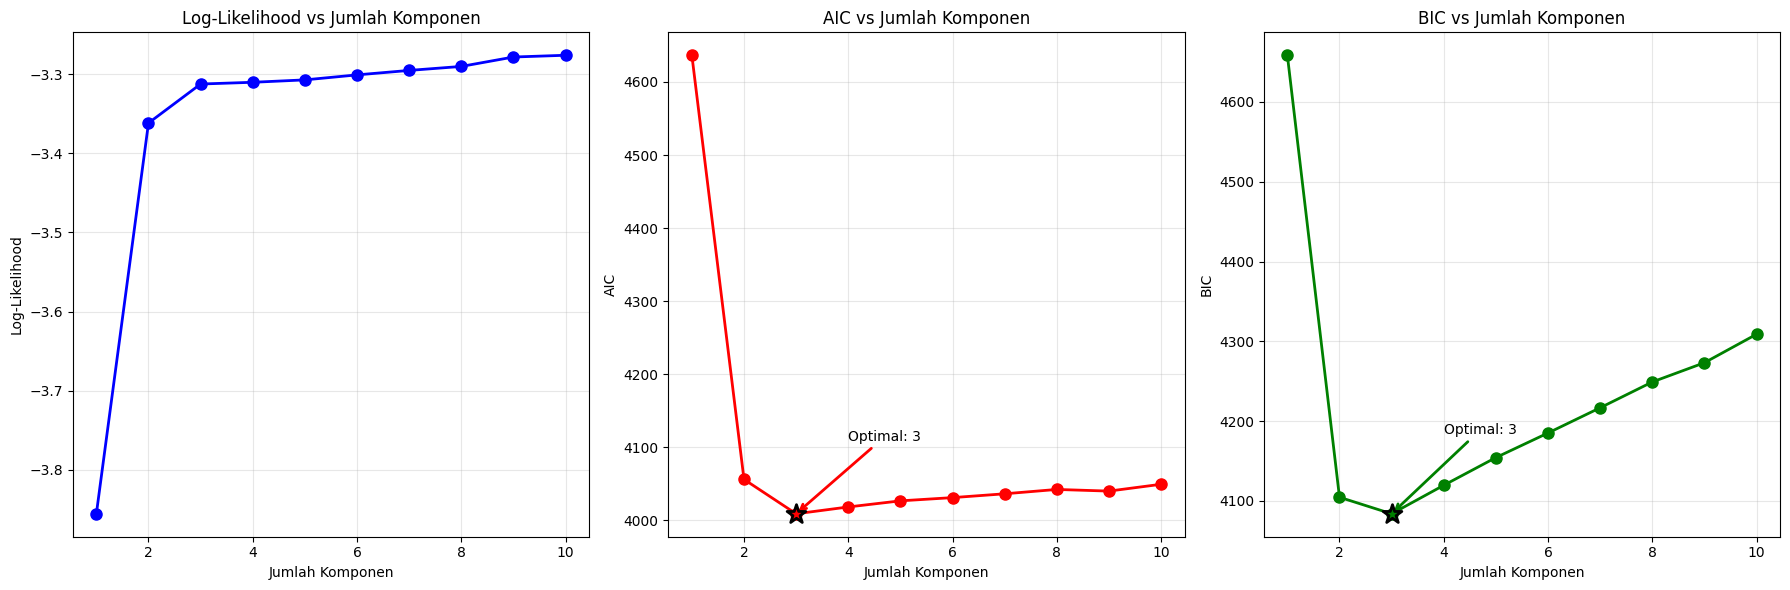


=== Rekomendasi Model Selection ===
Optimal berdasarkan AIC: 3 komponen
Optimal berdasarkan BIC: 3 komponen

=== Bayesian Gaussian Mixture Model ===
Bayesian GMM dapat otomatis menentukan jumlah cluster optimal

Weights dari Bayesian GMM:
Raw weights: [3.26604474e-01 1.75981191e-03 3.44426670e-01 1.74569284e-03
 3.25299469e-01 1.48985077e-04 1.35440685e-05 1.23127896e-06
 1.11934451e-07 1.01758592e-08]
Rounded weights: [0.327 0.002 0.344 0.002 0.325 0.    0.    0.    0.    0.   ]

Jumlah cluster aktif (weight > 0.01): 3


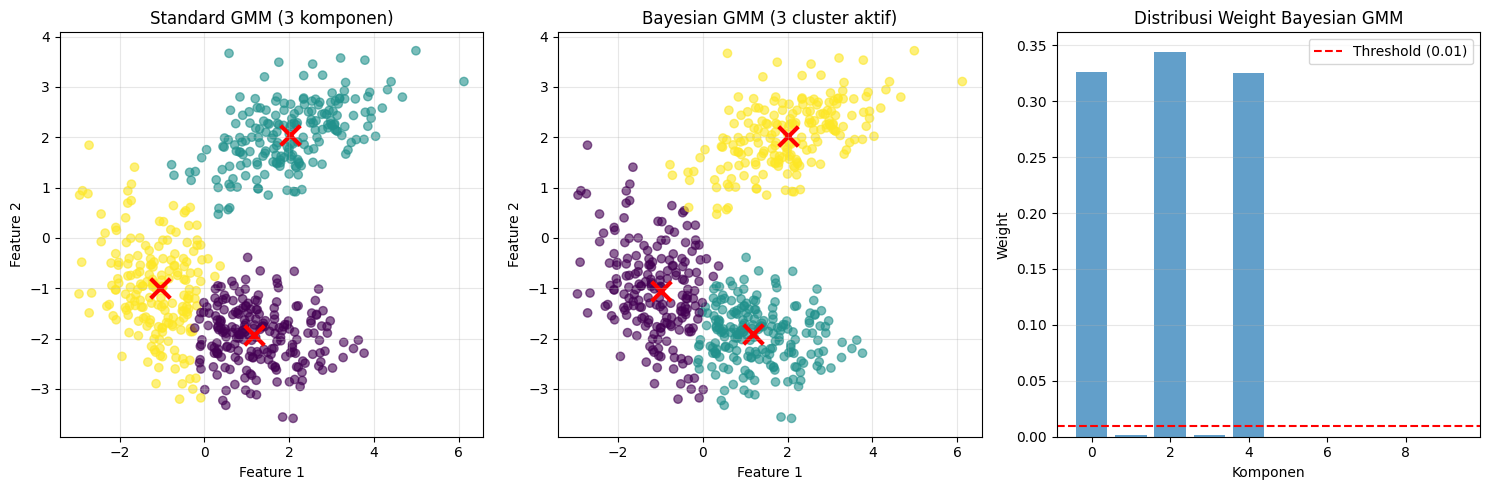


=== Pengaruh Weight Concentration Prior ===
Concentration 0.1: 3 cluster aktif
  Weights: [0.327 0.344 0.325]
Concentration 1.0: 3 cluster aktif
  Weights: [0.326 0.344 0.325]
Concentration 10.0: 3 cluster aktif
  Weights: [0.324 0.342 0.323]


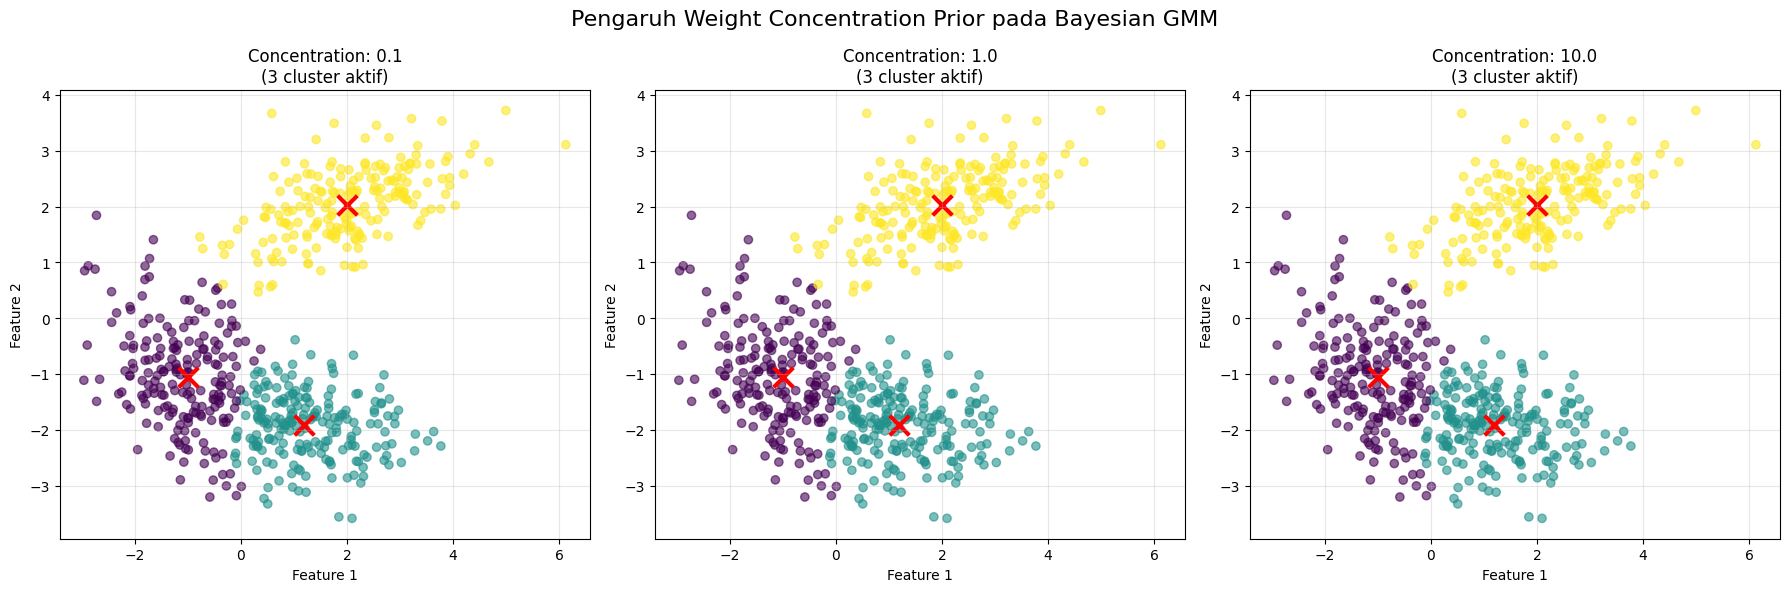


Keterangan:
- Concentration rendah (0.1): Cenderung menghasilkan sedikit cluster besar
- Concentration tinggi (10.0): Cenderung menghasilkan banyak cluster kecil
- Concentration default (1.0): Seimbang antara keduanya


In [53]:
# Model Selection untuk GMM
print("=== Model Selection untuk GMM ===")

# Range jumlah komponen untuk ditest
n_components_range = range(1, 11)
aic_scores = []
bic_scores = []
log_likelihoods = []

print("n_comp\tLog-Likelihood\tAIC\t\tBIC")
print("-" * 50)

for n_comp in n_components_range:
    gm = GaussianMixture(n_components=n_comp, random_state=42, n_init=10)
    gm.fit(X_ellipsoid)
    
    log_likelihood = gm.score(X_ellipsoid)
    aic = gm.aic(X_ellipsoid)
    bic = gm.bic(X_ellipsoid)
    
    log_likelihoods.append(log_likelihood)
    aic_scores.append(aic)
    bic_scores.append(bic)
    
    print(f"{n_comp}\t{log_likelihood:.1f}\t\t{aic:.1f}\t{bic:.1f}")

# Plot model selection metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Log-likelihood
axes[0].plot(n_components_range, log_likelihoods, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Jumlah Komponen')
axes[0].set_ylabel('Log-Likelihood')
axes[0].set_title('Log-Likelihood vs Jumlah Komponen')
axes[0].grid(True, alpha=0.3)

# AIC
axes[1].plot(n_components_range, aic_scores, 'ro-', linewidth=2, markersize=8)
optimal_aic_idx = np.argmin(aic_scores)
optimal_aic_n = n_components_range[optimal_aic_idx]
axes[1].scatter(optimal_aic_n, aic_scores[optimal_aic_idx], c='red', s=200, marker='*', 
               edgecolors='black', linewidths=2, zorder=5)
axes[1].annotate(f'Optimal: {optimal_aic_n}', 
                xy=(optimal_aic_n, aic_scores[optimal_aic_idx]),
                xytext=(optimal_aic_n+1, aic_scores[optimal_aic_idx]+100),
                arrowprops=dict(arrowstyle='->', color='red', lw=2))
axes[1].set_xlabel('Jumlah Komponen')
axes[1].set_ylabel('AIC')
axes[1].set_title('AIC vs Jumlah Komponen')
axes[1].grid(True, alpha=0.3)

# BIC
axes[2].plot(n_components_range, bic_scores, 'go-', linewidth=2, markersize=8)
optimal_bic_idx = np.argmin(bic_scores)
optimal_bic_n = n_components_range[optimal_bic_idx]
axes[2].scatter(optimal_bic_n, bic_scores[optimal_bic_idx], c='green', s=200, marker='*', 
               edgecolors='black', linewidths=2, zorder=5)
axes[2].annotate(f'Optimal: {optimal_bic_n}', 
                xy=(optimal_bic_n, bic_scores[optimal_bic_idx]),
                xytext=(optimal_bic_n+1, bic_scores[optimal_bic_idx]+100),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))
axes[2].set_xlabel('Jumlah Komponen')
axes[2].set_ylabel('BIC')
axes[2].set_title('BIC vs Jumlah Komponen')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== Rekomendasi Model Selection ===")
print(f"Optimal berdasarkan AIC: {optimal_aic_n} komponen")
print(f"Optimal berdasarkan BIC: {optimal_bic_n} komponen")

# Bayesian GMM untuk otomatis menentukan jumlah cluster
print("\n=== Bayesian Gaussian Mixture Model ===")
print("Bayesian GMM dapat otomatis menentukan jumlah cluster optimal")

# Set jumlah komponen lebih tinggi dari yang diperlukan
bgm = BayesianGaussianMixture(n_components=10, random_state=42, n_init=10)
bgm.fit(X_ellipsoid)

print(f"\nWeights dari Bayesian GMM:")
print(f"Raw weights: {bgm.weights_}")
print(f"Rounded weights: {np.round(bgm.weights_, 3)}")

# Hitung jumlah cluster aktif (weight > threshold)
weight_threshold = 0.01
active_clusters = np.sum(bgm.weights_ > weight_threshold)
print(f"\nJumlah cluster aktif (weight > {weight_threshold}): {active_clusters}")

# Visualisasi Bayesian GMM
y_pred_bgm = bgm.predict(X_ellipsoid)

plt.figure(figsize=(15, 5))

# Plot 1: Standard GMM dengan 3 komponen
plt.subplot(1, 3, 1)
gm_3 = GaussianMixture(n_components=3, random_state=42, n_init=10)
y_pred_3 = gm_3.fit_predict(X_ellipsoid)
plt.scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_pred_3, cmap='viridis', alpha=0.6)
plt.scatter(gm_3.means_[:, 0], gm_3.means_[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('Standard GMM (3 komponen)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# Plot 2: Bayesian GMM
plt.subplot(1, 3, 2)
plt.scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_pred_bgm, cmap='viridis', alpha=0.6)
# Hanya plot means untuk cluster aktif
active_means = bgm.means_[bgm.weights_ > weight_threshold]
plt.scatter(active_means[:, 0], active_means[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title(f'Bayesian GMM ({active_clusters} cluster aktif)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# Plot 3: Weight distribution
plt.subplot(1, 3, 3)
plt.bar(range(len(bgm.weights_)), bgm.weights_, alpha=0.7)
plt.axhline(y=weight_threshold, color='red', linestyle='--', label=f'Threshold ({weight_threshold})')
plt.xlabel('Komponen')
plt.ylabel('Weight')
plt.title('Distribusi Weight Bayesian GMM')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Perbandingan konsentrasi prior
print("\n=== Pengaruh Weight Concentration Prior ===")
concentration_priors = [0.1, 1.0, 10.0]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Pengaruh Weight Concentration Prior pada Bayesian GMM', fontsize=16)

for idx, concentration in enumerate(concentration_priors):
    bgm_conc = BayesianGaussianMixture(n_components=10, 
                                      weight_concentration_prior=concentration,
                                      random_state=42, n_init=10)
    bgm_conc.fit(X_ellipsoid)
    y_pred_conc = bgm_conc.predict(X_ellipsoid)
    
    active_clusters_conc = np.sum(bgm_conc.weights_ > weight_threshold)
    
    axes[idx].scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=y_pred_conc, cmap='viridis', alpha=0.6)
    active_means_conc = bgm_conc.means_[bgm_conc.weights_ > weight_threshold]
    axes[idx].scatter(active_means_conc[:, 0], active_means_conc[:, 1], c='red', marker='x', s=200, linewidths=3)
    axes[idx].set_title(f'Concentration: {concentration}\n({active_clusters_conc} cluster aktif)')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)
    
    print(f"Concentration {concentration}: {active_clusters_conc} cluster aktif")
    print(f"  Weights: {np.round(bgm_conc.weights_[bgm_conc.weights_ > weight_threshold], 3)}")

plt.tight_layout()
plt.show()

print("\nKeterangan:")
print("- Concentration rendah (0.1): Cenderung menghasilkan sedikit cluster besar")
print("- Concentration tinggi (10.0): Cenderung menghasilkan banyak cluster kecil")
print("- Concentration default (1.0): Seimbang antara keduanya")

## 9.10 Anomaly Detection dengan GMM

GMM dapat digunakan untuk anomaly detection dengan menganggap instance di area dengan kepadatan rendah sebagai anomali.

=== Anomaly Detection dengan Gaussian Mixture Models ===
Density statistics:
  Min log-density: -10.577
  Max log-density: -2.310
  Mean log-density: -3.313
  Std log-density: 0.918

Anomaly detection threshold:
  Percentile: 4%
  Log-density threshold: -5.180

Anomaly detection results:
  Total anomalies: 24
  Percentage: 4.0%


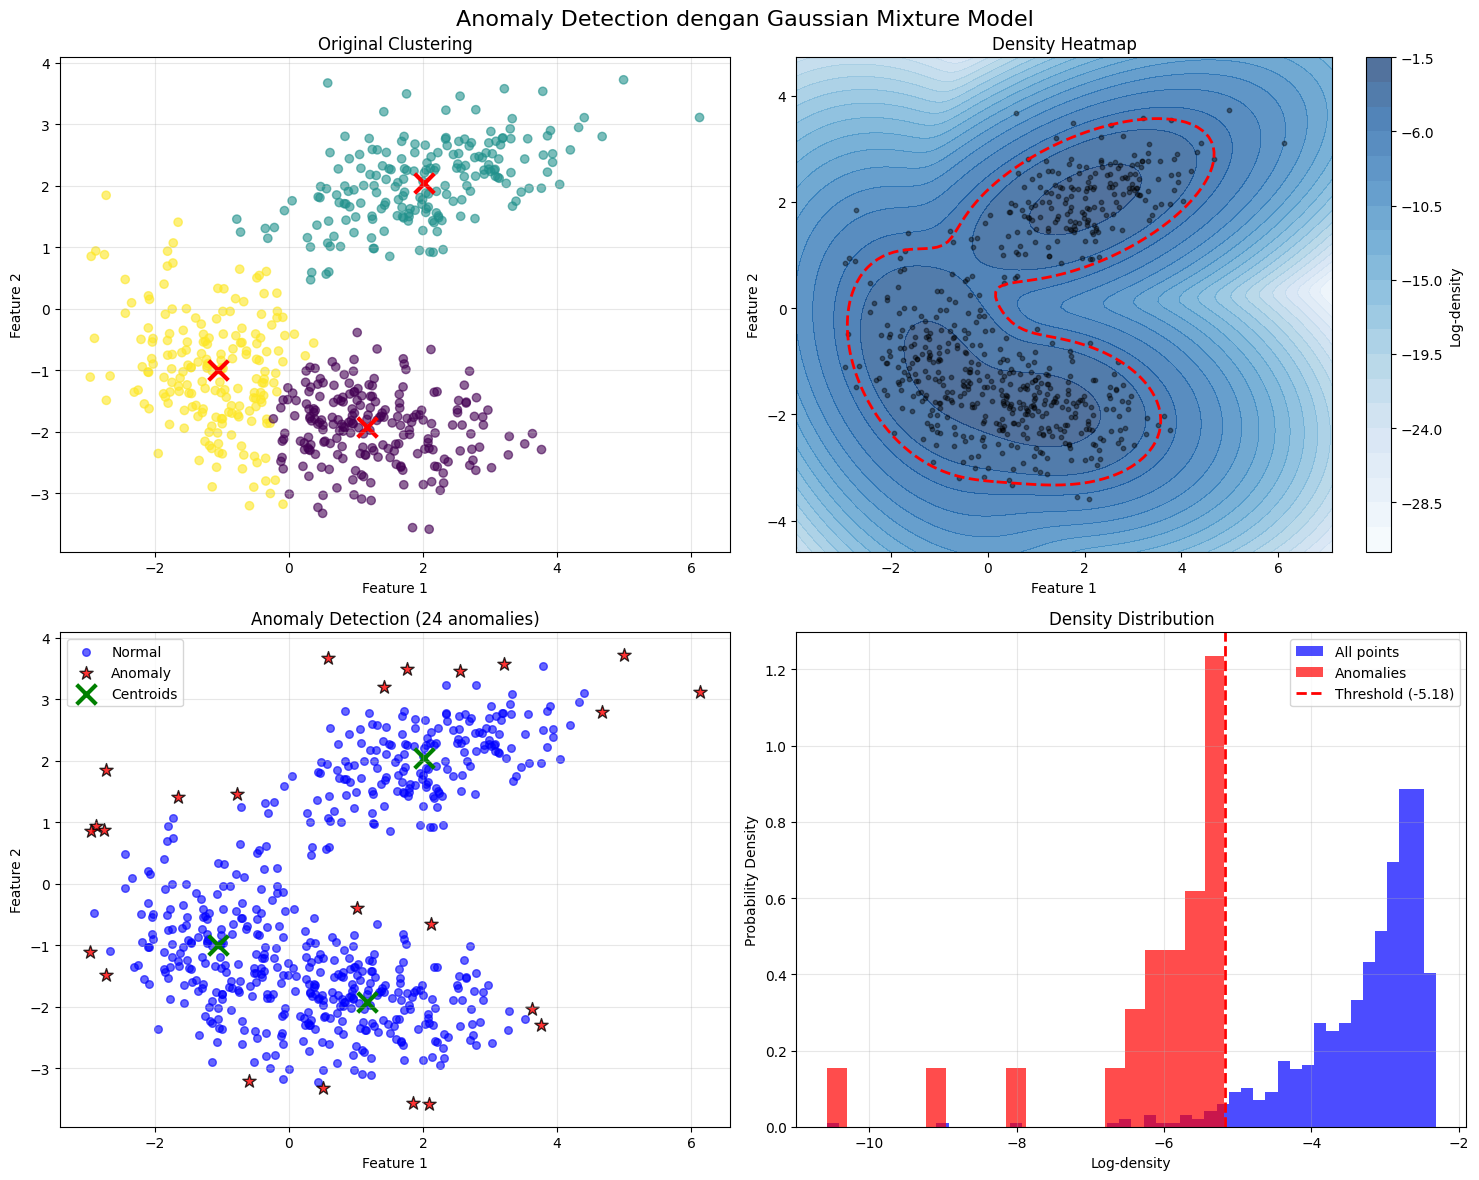


=== Analisis Anomali yang Terdeteksi ===
5 anomali dengan density terendah:
  Anomaly 1: (0.58, 3.67), log-density: -10.577
  Anomaly 2: (6.12, 3.11), log-density: -9.005
  Anomaly 3: (-2.72, 1.84), log-density: -7.978
  Anomaly 4: (4.99, 3.72), log-density: -6.740
  Anomaly 5: (2.09, -3.59), log-density: -6.494

=== Evaluasi dengan Data Anomali Buatan ===
Evaluasi performa deteksi anomali:
  True Positives: 5
  False Positives: 24
  True Negatives: 576
  False Negatives: 0
  Precision: 0.172
  Recall: 1.000
  F1-Score: 0.294


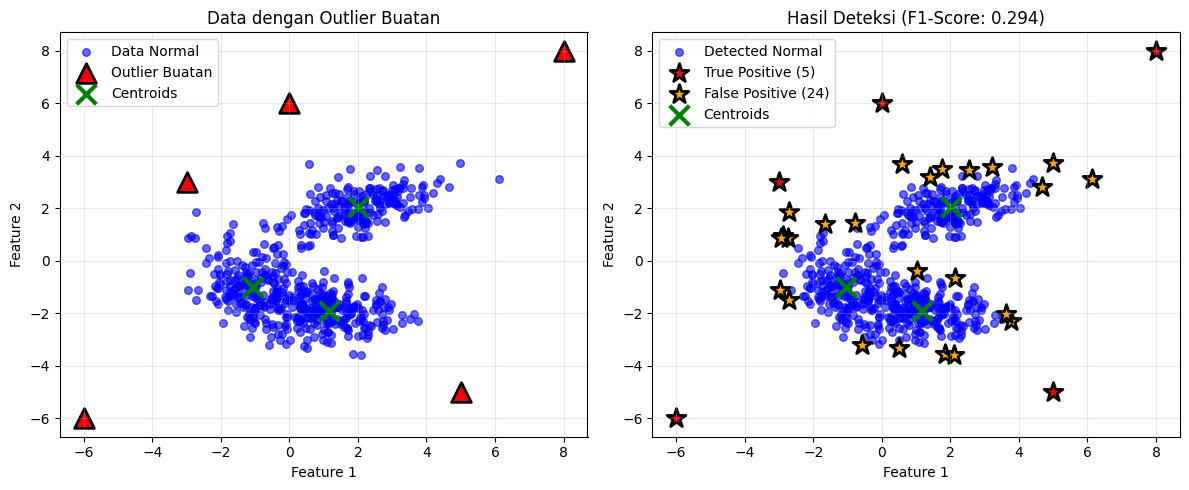


Density scores untuk outlier buatan:
  Outlier 1: ( 8.0,  8.0) -> -43.592 ✓
  Outlier 2: (-6.0, -6.0) -> -51.045 ✓
  Outlier 3: ( 5.0, -5.0) -> -20.983 ✓
  Outlier 4: ( 0.0,  6.0) -> -38.762 ✓
  Outlier 5: (-3.0,  3.0) -> -12.532 ✓


In [54]:
# Anomaly Detection dengan GMM
print("=== Anomaly Detection dengan Gaussian Mixture Models ===")

# Gunakan model GMM yang sudah dilatih
gm_anomaly = GaussianMixture(n_components=3, random_state=42, n_init=10)
gm_anomaly.fit(X_ellipsoid)

# Hitung density untuk semua points
log_densities = gm_anomaly.score_samples(X_ellipsoid)
densities = np.exp(log_densities)

print(f"Density statistics:")
print(f"  Min log-density: {log_densities.min():.3f}")
print(f"  Max log-density: {log_densities.max():.3f}")
print(f"  Mean log-density: {log_densities.mean():.3f}")
print(f"  Std log-density: {log_densities.std():.3f}")

# Set threshold untuk anomaly detection
percentile_threshold = 4  # 4% terendah dianggap anomali
density_threshold = np.percentile(log_densities, percentile_threshold)

print(f"\nAnomaly detection threshold:")
print(f"  Percentile: {percentile_threshold}%")
print(f"  Log-density threshold: {density_threshold:.3f}")

# Identifikasi anomali
anomalies_mask = log_densities < density_threshold
n_anomalies = np.sum(anomalies_mask)
anomaly_percentage = (n_anomalies / len(X_ellipsoid)) * 100

print(f"\nAnomaly detection results:")
print(f"  Total anomalies: {n_anomalies}")
print(f"  Percentage: {anomaly_percentage:.1f}%")

# Visualisasi anomaly detection
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Anomaly Detection dengan Gaussian Mixture Model', fontsize=16)

# Plot 1: Original clustering
axes[0, 0].scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c=gm_anomaly.predict(X_ellipsoid), 
                  cmap='viridis', alpha=0.6)
axes[0, 0].scatter(gm_anomaly.means_[:, 0], gm_anomaly.means_[:, 1], c='red', marker='x', s=200, linewidths=3)
axes[0, 0].set_title('Original Clustering')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Density heatmap
x_min, x_max = X_ellipsoid[:, 0].min() - 1, X_ellipsoid[:, 0].max() + 1
y_min, y_max = X_ellipsoid[:, 1].min() - 1, X_ellipsoid[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
mesh_points = np.array([xx.ravel(), yy.ravel()]).T

log_prob_mesh = gm_anomaly.score_samples(mesh_points)
log_prob_mesh = log_prob_mesh.reshape(xx.shape)

contour = axes[0, 1].contourf(xx, yy, log_prob_mesh, levels=20, cmap='Blues', alpha=0.7)
plt.colorbar(contour, ax=axes[0, 1], label='Log-density')
axes[0, 1].scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c='black', alpha=0.4, s=10)
axes[0, 1].contour(xx, yy, log_prob_mesh, levels=[density_threshold], colors='red', linestyles='--', linewidths=2)
axes[0, 1].set_title('Density Heatmap')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')

# Plot 3: Anomaly detection results
normal_mask = ~anomalies_mask
axes[1, 0].scatter(X_ellipsoid[normal_mask, 0], X_ellipsoid[normal_mask, 1], 
                  c='blue', alpha=0.6, s=30, label='Normal')
axes[1, 0].scatter(X_ellipsoid[anomalies_mask, 0], X_ellipsoid[anomalies_mask, 1], 
                  c='red', marker='*', s=100, alpha=0.8, label='Anomaly', edgecolors='black')
axes[1, 0].scatter(gm_anomaly.means_[:, 0], gm_anomaly.means_[:, 1], c='green', marker='x', s=200, linewidths=3, label='Centroids')
axes[1, 0].set_title(f'Anomaly Detection ({n_anomalies} anomalies)')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Density histogram
axes[1, 1].hist(log_densities, bins=50, alpha=0.7, color='blue', density=True, label='All points')
axes[1, 1].hist(log_densities[anomalies_mask], bins=20, alpha=0.7, color='red', density=True, label='Anomalies')
axes[1, 1].axvline(density_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold ({density_threshold:.2f})')
axes[1, 1].set_xlabel('Log-density')
axes[1, 1].set_ylabel('Probability Density')
axes[1, 1].set_title('Density Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis anomali yang terdeteksi
print("\n=== Analisis Anomali yang Terdeteksi ===")
anomaly_points = X_ellipsoid[anomalies_mask]
anomaly_densities = log_densities[anomalies_mask]

print("5 anomali dengan density terendah:")
sorted_indices = np.argsort(anomaly_densities)
for i in range(min(5, len(anomaly_points))):
    idx = sorted_indices[i]
    point = anomaly_points[idx]
    density = anomaly_densities[idx]
    print(f"  Anomaly {i+1}: ({point[0]:.2f}, {point[1]:.2f}), log-density: {density:.3f}")

# Membuat dan mengevaluasi data anomali buatan
print("\n=== Evaluasi dengan Data Anomali Buatan ===")

# Tambahkan beberapa outlier yang jelas
outliers = np.array([
    [8, 8],    # Jauh dari semua cluster
    [-6, -6],  # Jauh dari semua cluster
    [5, -5],   # Di antara cluster tapi jauh
    [0, 6],    # Di atas semua cluster
    [-3, 3]    # Di sebelah kiri atas
])

# Gabungkan data asli dengan outlier
X_with_outliers = np.vstack([X_ellipsoid, outliers])
n_original = len(X_ellipsoid)

# Hitung density untuk data gabungan
log_densities_all = gm_anomaly.score_samples(X_with_outliers)

# Set threshold yang sama
anomalies_all_mask = log_densities_all < density_threshold

# Evaluasi performa deteksi
true_anomalies = np.zeros(len(X_with_outliers), dtype=bool)
true_anomalies[n_original:] = True  # Outlier buatan adalah anomali sesungguhnya

detected_anomalies = anomalies_all_mask

# Confusion matrix components
true_positives = np.sum(true_anomalies & detected_anomalies)
false_positives = np.sum(~true_anomalies & detected_anomalies)
true_negatives = np.sum(~true_anomalies & ~detected_anomalies)
false_negatives = np.sum(true_anomalies & ~detected_anomalies)

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Evaluasi performa deteksi anomali:")
print(f"  True Positives: {true_positives}")
print(f"  False Positives: {false_positives}")  
print(f"  True Negatives: {true_negatives}")
print(f"  False Negatives: {false_negatives}")
print(f"  Precision: {precision:.3f}")
print(f"  Recall: {recall:.3f}")
print(f"  F1-Score: {f1_score:.3f}")

# Visualisasi evaluasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Data asli
plt.scatter(X_ellipsoid[:, 0], X_ellipsoid[:, 1], c='blue', alpha=0.6, s=30, label='Data Normal')
# Outlier buatan
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='^', s=200, 
           edgecolors='black', linewidths=2, label='Outlier Buatan')
# Centroids
plt.scatter(gm_anomaly.means_[:, 0], gm_anomaly.means_[:, 1], c='green', marker='x', s=200, linewidths=3, label='Centroids')

plt.title('Data dengan Outlier Buatan')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Normal points
normal_data_mask = ~anomalies_all_mask
plt.scatter(X_with_outliers[normal_data_mask, 0], X_with_outliers[normal_data_mask, 1], 
           c='blue', alpha=0.6, s=30, label='Detected Normal')

# Detected anomalies - separate TP and FP
tp_mask = detected_anomalies & true_anomalies
fp_mask = detected_anomalies & ~true_anomalies

if np.sum(tp_mask) > 0:
    plt.scatter(X_with_outliers[tp_mask, 0], X_with_outliers[tp_mask, 1], 
               c='red', marker='*', s=200, edgecolors='black', linewidths=2, 
               label=f'True Positive ({np.sum(tp_mask)})')

if np.sum(fp_mask) > 0:
    plt.scatter(X_with_outliers[fp_mask, 0], X_with_outliers[fp_mask, 1], 
               c='orange', marker='*', s=200, edgecolors='black', linewidths=2, 
               label=f'False Positive ({np.sum(fp_mask)})')

# False negatives
fn_mask = ~detected_anomalies & true_anomalies
if np.sum(fn_mask) > 0:
    plt.scatter(X_with_outliers[fn_mask, 0], X_with_outliers[fn_mask, 1], 
               c='yellow', marker='^', s=200, edgecolors='red', linewidths=3, 
               label=f'False Negative ({np.sum(fn_mask)})')

plt.scatter(gm_anomaly.means_[:, 0], gm_anomaly.means_[:, 1], c='green', marker='x', s=200, linewidths=3, label='Centroids')

plt.title(f'Hasil Deteksi (F1-Score: {f1_score:.3f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Density scores untuk outlier buatan
print("\nDensity scores untuk outlier buatan:")
outlier_densities = log_densities_all[n_original:]
for i, (outlier, density) in enumerate(zip(outliers, outlier_densities)):
    detected = "✓" if density < density_threshold else "✗"
    print(f"  Outlier {i+1}: ({outlier[0]:4.1f}, {outlier[1]:4.1f}) -> {density:.3f} {detected}")

## 9.11 Algoritma Clustering Lainnya

Selain K-Means, DBSCAN, dan GMM, ada beberapa algoritma clustering lainnya yang penting:

### 1. Agglomerative Clustering
- Hierarchical clustering dari bawah ke atas
- Membangun tree of clusters
- Baik untuk cluster dengan berbagai bentuk

### 2. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
- Dirancang untuk dataset sangat besar
- Menggunakan tree structure untuk efisiensi memori

### 3. Mean-Shift
- Bergerak ke arah density maksimum lokal
- Tidak perlu menentukan jumlah cluster
- Mirip DBSCAN dalam konsep density

### 4. Spectral Clustering
- Menggunakan eigenvalue/eigenvector dari similarity matrix
- Baik untuk cluster dengan struktur kompleks

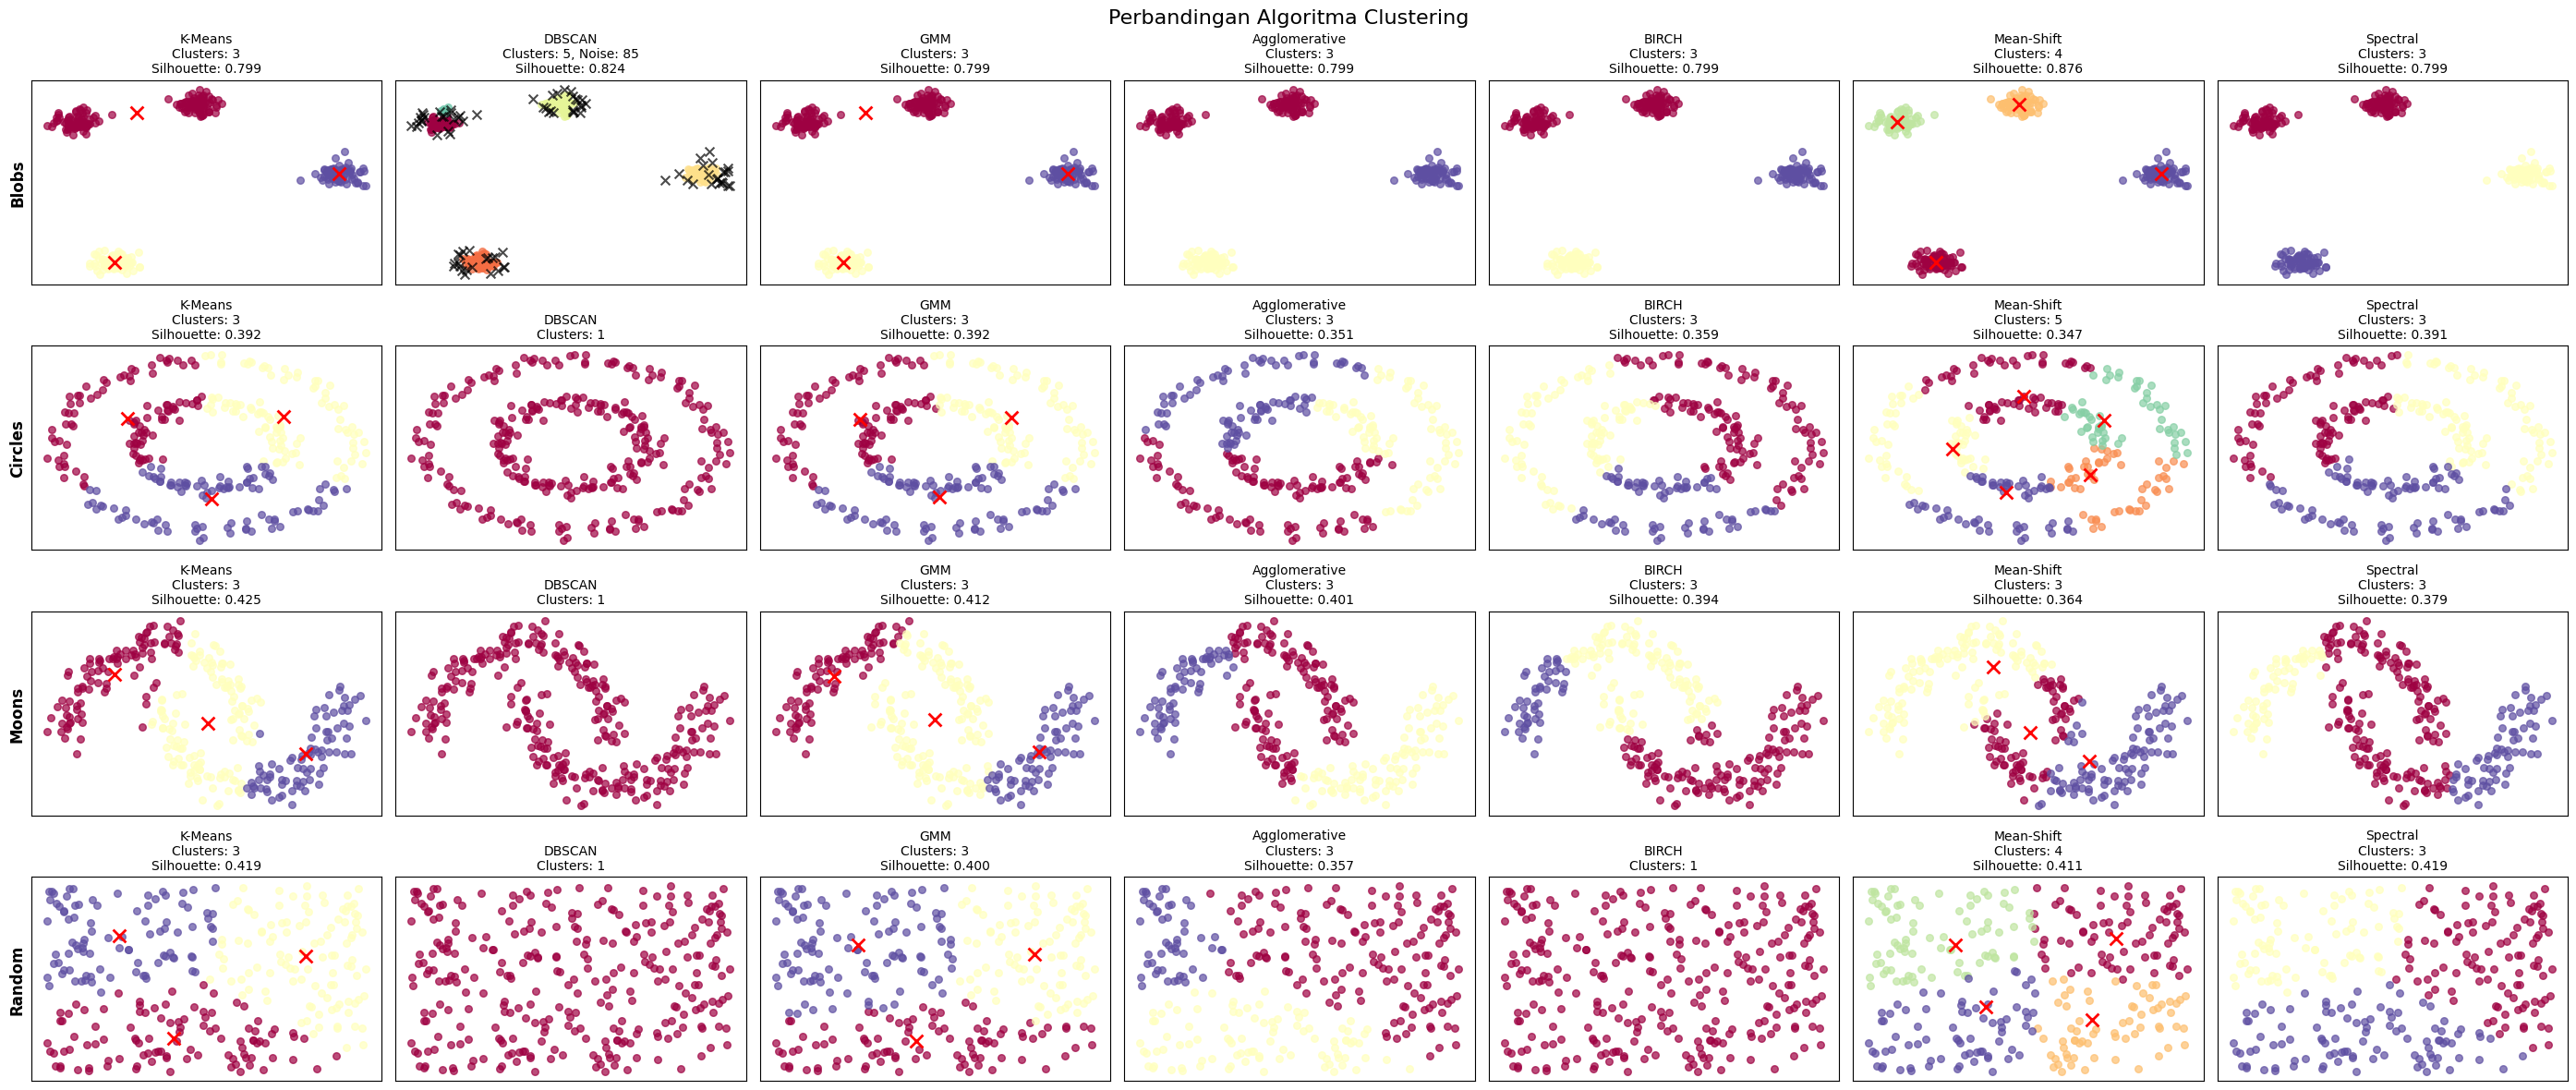


=== Ringkasan Performa Algoritma ===
Dataset		Algorithm		Clusters	Silhouette	Time(s)
--------------------------------------------------------------------------------

Blobs:
  K-Means             	3		0.799		0.0322
  DBSCAN              	5		0.824		0.0042
  GMM                 	3		0.799		0.0708
  Agglomerative       	3		0.799		0.0019
  BIRCH               	3		0.799		0.0132
  Mean-Shift          	4		0.876		0.4577
  Spectral            	3		0.799		0.1251

Circles:
  K-Means             	3		0.392		0.0233
  DBSCAN              	1		N/A		0.0041
  GMM                 	3		0.392		0.1171
  Agglomerative       	3		0.351		0.0051
  BIRCH               	3		0.359		0.0085
  Mean-Shift          	5		0.347		0.8804
  Spectral            	3		0.391		0.1085

Moons:
  K-Means             	3		0.425		0.0316
  DBSCAN              	1		N/A		0.0030
  GMM                 	3		0.412		0.1749
  Agglomerative       	3		0.401		0.0018
  BIRCH               	3		0.394		0.0070
  Mean-Shift          	3		0.364		1.5676
  Spectral 

In [61]:
# Demonstrasi algoritma clustering lainnya
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs, make_circles, make_moons
try:
    from sklearn.cluster import Birch
    BIRCH = Birch  # Use Birch instead of BIRCH
except ImportError:
    try:
        from sklearn.cluster import BIRCH
    except ImportError:
        # If BIRCH is not available, we'll skip it
        BIRCH = None
import time

# Create sample datasets
np.random.seed(42)

# Dataset 1: Blobs (well-separated clusters)
X1, _ = make_blobs(n_samples=300, centers=4, n_features=2, 
                   random_state=42, cluster_std=0.60)

# Dataset 2: Circles (nested circles)
X2, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Dataset 3: Moons (crescent shapes)
X3, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Dataset 4: Random data
X4 = np.random.random((300, 2))

datasets = {
    'Blobs': X1,
    'Circles': X2, 
    'Moons': X3,
    'Random': X4
}

algorithms = {
    'K-Means': lambda X: KMeans(n_clusters=3, random_state=42, n_init=10),
    'DBSCAN': lambda X: DBSCAN(eps=0.3, min_samples=5),
    'GMM': lambda X: GaussianMixture(n_components=3, random_state=42, n_init=10),
    'Agglomerative': lambda X: AgglomerativeClustering(n_clusters=3),
    'Mean-Shift': lambda X: MeanShift(bandwidth=estimate_bandwidth(X, quantile=0.2)),
    'Spectral': lambda X: SpectralClustering(n_clusters=3, random_state=42)
}

# Add BIRCH only if it's available
if BIRCH is not None:
    algorithms['BIRCH'] = lambda X: BIRCH(n_clusters=3, threshold=0.5)
algorithms = {
    'K-Means': lambda X: KMeans(n_clusters=3, random_state=42, n_init=10),
    'DBSCAN': lambda X: DBSCAN(eps=0.3, min_samples=5),
    'GMM': lambda X: GaussianMixture(n_components=3, random_state=42, n_init=10),
    'Agglomerative': lambda X: AgglomerativeClustering(n_clusters=3),
    'BIRCH': lambda X: BIRCH(n_clusters=3, threshold=0.5),
    'Mean-Shift': lambda X: MeanShift(bandwidth=estimate_bandwidth(X, quantile=0.2)),
    'Spectral': lambda X: SpectralClustering(n_clusters=3, random_state=42)
}

# Visualisasi perbandingan
fig, axes = plt.subplots(len(datasets), len(algorithms), figsize=(28, 12))
fig.suptitle('Perbandingan Algoritma Clustering', fontsize=16)

results = {}

for dataset_idx, (dataset_name, X_data) in enumerate(datasets.items()):
    results[dataset_name] = {}
    
    for algo_idx, (algo_name, algo_func) in enumerate(algorithms.items()):
        ax = axes[dataset_idx, algo_idx]
        
        try:
            # Ukur waktu eksekusi
            start_time = time.time()
            
            # Fit algoritma
            clusterer = algo_func(X_data)
            
            if hasattr(clusterer, 'fit_predict'):
                labels = clusterer.fit_predict(X_data)
            else:
                clusterer.fit(X_data)
                labels = clusterer.predict(X_data)
            
            execution_time = time.time() - start_time
            
            # Hitung metrik
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1) if -1 in labels else 0
            
            # Silhouette score (hanya jika ada lebih dari 1 cluster dan tidak semua noise)
            if n_clusters > 1 and len(set(labels)) > 1:
                # Exclude noise points untuk silhouette score
                non_noise_mask = labels != -1
                if np.sum(non_noise_mask) > 1 and len(set(labels[non_noise_mask])) > 1:
                    silhouette = silhouette_score(X_data[non_noise_mask], labels[non_noise_mask])
                else:
                    silhouette = -1
            else:
                silhouette = -1
            
            # Simpan hasil
            results[dataset_name][algo_name] = {
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette': silhouette,
                'time': execution_time,
                'labels': labels
            }
            
            # Plot hasil
            unique_labels = set(labels)
            colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
            
            for k, col in zip(unique_labels, colors):
                if k == -1:
                    # Noise points
                    col = [0, 0, 0, 1]
                    marker = 'x'
                    size = 50
                else:
                    marker = 'o'
                    size = 30
                
                class_member_mask = (labels == k)
                xy = X_data[class_member_mask]
                if len(xy) > 0:
                    ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=0.7)
            
            # Tambahkan centroids jika ada
            if hasattr(clusterer, 'cluster_centers_'):
                ax.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], 
                          c='red', marker='x', s=100, linewidths=2)
            elif hasattr(clusterer, 'means_'):
                ax.scatter(clusterer.means_[:, 0], clusterer.means_[:, 1], 
                          c='red', marker='x', s=100, linewidths=2)
            
            title = f'{algo_name}\nClusters: {n_clusters}'
            if n_noise > 0:
                title += f', Noise: {n_noise}'
            if silhouette > -1:
                title += f'\nSilhouette: {silhouette:.3f}'
            
        except Exception as e:
            # Jika algoritma gagal
            ax.scatter(X_data[:, 0], X_data[:, 1], c='gray', alpha=0.5)
            title = f'{algo_name}\nFAILED'
            results[dataset_name][algo_name] = {
                'n_clusters': 0,
                'n_noise': 0,
                'silhouette': -1,
                'time': -1,
                'error': str(e)
            }
        
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Label dataset di kolom pertama
        if algo_idx == 0:
            ax.set_ylabel(dataset_name, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Tabel performa
print("\n=== Ringkasan Performa Algoritma ===")
print("Dataset\t\tAlgorithm\t\tClusters\tSilhouette\tTime(s)")
print("-" * 80)

for dataset_name, dataset_results in results.items():
    print(f"\n{dataset_name}:")
    for algo_name, metrics in dataset_results.items():
        if 'error' not in metrics:
            silhouette_str = f"{metrics['silhouette']:.3f}" if metrics['silhouette'] > -1 else "N/A"
            time_str = f"{metrics['time']:.4f}" if metrics['time'] > -1 else "N/A"
            print(f"  {algo_name:<20}\t{metrics['n_clusters']}\t\t{silhouette_str}\t\t{time_str}")
        else:
            print(f"  {algo_name:<20}\tFAILED\t\tN/A\t\tN/A")

# Analisis detail untuk setiap algoritma
print("\n=== Analisis Detail Algoritma ===")

print("\n1. **K-Means**:")
print("   - Cepat dan efisien")
print("   - Baik untuk cluster bulat dengan ukuran serupa")
print("   - Butuh menentukan jumlah cluster")

print("\n2. **DBSCAN**:")
print("   - Dapat menemukan cluster dengan bentuk arbitrer")
print("   - Otomatis menentukan jumlah cluster")
print("   - Sensitif terhadap parameter eps dan min_samples")

print("\n3. **Gaussian Mixture Model**:")
print("   - Soft clustering dengan probabilitas")
print("   - Baik untuk cluster ellipsoidal")
print("   - Dapat digunakan untuk density estimation")

print("\n4. **Agglomerative Clustering**:")
print("   - Hierarchical clustering")
print("   - Dapat menangani berbagai bentuk cluster")
print("   - Scalable dengan connectivity matrix")

print("\n5. **BIRCH**:")
print("   - Dirancang untuk dataset besar")
print("   - Efisien dalam penggunaan memori")
print("   - Baik untuk cluster bulat")

print("\n6. **Mean-Shift**:")
print("   - Otomatis menentukan jumlah cluster")
print("   - Bergerak ke density maksimum")
print("   - Lambat untuk dataset besar (O(n²))")

print("\n7. **Spectral Clustering**:")
print("   - Baik untuk cluster dengan struktur kompleks")
print("   - Menggunakan eigendecomposition")
print("   - Tidak scalable untuk dataset besar")

# Rekomendasi berdasarkan karakteristik data
print("\n=== Rekomendasi Pemilihan Algoritma ===")
print("\n**Berdasarkan Bentuk Cluster:**")
print("- Bulat/Spherical: K-Means, BIRCH")
print("- Ellipsoidal: Gaussian Mixture Model")
print("- Bentuk Arbitrer: DBSCAN, Mean-Shift, Spectral")

print("\n**Berdasarkan Ukuran Dataset:**")
print("- Kecil (<1K): Semua algoritma cocok")
print("- Sedang (1K-100K): K-Means, DBSCAN, GMM, Agglomerative")
print("- Besar (>100K): K-Means, Mini-Batch K-Means, BIRCH")

print("\n**Berdasarkan Pengetahuan tentang Jumlah Cluster:**")
print("- Diketahui: K-Means, GMM, Agglomerative, Spectral")
print("- Tidak Diketahui: DBSCAN, Mean-Shift, Bayesian GMM")

print("\n**Berdasarkan Kebutuhan:**")
print("- Clustering Cepat: K-Means, Mini-Batch K-Means")
print("- Soft Clustering: Gaussian Mixture Model")
print("- Deteksi Outlier: DBSCAN, Mean-Shift")
print("- Hierarchical Structure: Agglomerative Clustering")

## 9.12 Rangkuman

Dalam bab ini, kita telah mempelajari berbagai teknik unsupervised learning:

### Clustering Algorithms:
1. **K-Means**: Cepat, efisien, cocok untuk cluster bulat
2. **DBSCAN**: Menangani bentuk arbitrer, deteksi outlier
3. **Gaussian Mixture Models**: Soft clustering, generative model
4. **Algoritma Lainnya**: Agglomerative, BIRCH, Mean-Shift, Spectral

### Aplikasi Clustering:
- Segmentasi pelanggan
- Preprocessing dan reduksi dimensionalitas
- Semi-supervised learning
- Segmentasi gambar
- Deteksi anomali

### Teknik Evaluasi:
- Elbow method
- Silhouette analysis
- Information criteria (AIC, BIC)
- Domain knowledge

### Key Takeaways:
1. **Tidak ada algoritma universal** - pilihan tergantung pada karakteristik data
2. **Preprocessing penting** - scaling dan feature selection mempengaruhi hasil
3. **Evaluasi cluster** - gunakan multiple metrics dan visualisasi
4. **Parameter tuning** - eksperimen dengan berbagai parameter
5. **Domain knowledge** - gunakan pengetahuan domain untuk validasi hasil

### Praktik Terbaik:
- Mulai dengan eksplorasi data dan visualisasi
- Coba berbagai algoritma dan parameter
- Gunakan multiple evaluation metrics
- Validasi hasil dengan domain expertise
- Pertimbangkan scalability untuk dataset besar

Unsupervised learning adalah area yang sangat aktif dalam penelitian ML dengan banyak aplikasi praktis. Memahami kekuatan dan keterbatasan setiap algoritma akan membantu Anda memilih pendekatan yang tepat untuk masalah spesifik Anda.